<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply several classificaiton algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

### Installs

The following command is from Skills Developer Network; not sure yet if it's the best approach there, but it takes a very long time on Watson Studio:

    !conda install -c anaconda seaborn -y

Instead, convert the next cell to code and execute if this is run under a new user (or possibly environment) on IBM Cloud - Watson Studio

    !pip install --user seaborn
    !pip install --user pydotplus
    !pip install --user graphviz

### Imports

In [142]:
# General use imports
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.cm as cm
from sklearn import preprocessing
%matplotlib inline

# For scoring function definition
import numpy as np
from sklearn.metrics import make_scorer

# For environment definition section
from sklearn.metrics import get_scorer
import copy

# For KNN section
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# For Decision Tree section
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# For Decision Tree plotting section
#from sklearn.externals.six import StringIO # from SDN, preferred alternative on next line
from io import StringIO # Current alternative to the above line
import matplotlib.image as mpimg
%matplotlib inline
from sklearn import tree
import graphviz
import pydotplus

# For Support Vector Machine section
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# For Logistic Regression section
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Evaluation Section
#from sklearn.metrics import jaccard_similarity_score # Outdated, use jaccard_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Session Import

If resuming from an old session, load precomputed variables by converting to code and running the following block:
    
    import dill
    dill.load_session('notebook_env.db')
    
(note: the above block won't work in Jupyterlab with its hooks; as a workaround load the time-intensive RESULTS variable and regenerate everything else manually)

    # CAREFUL! This will load previously picled RESULTS into the environment.
    # All other variables will have to be regenerated.
    # Ease of regeneration has not yet been tested.
    import dill
    with open('loan_evaluation_results.db','rb') as file:
        RESULTS = dill.load(file)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset
 (for local development, skip this and import the local copy)

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

### Load Data From CSV File  

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

### Convert to date time object 

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



### Data Types
Are the data types of the columns as expected based on the df.head() examination above?

Check for missing values:

In [5]:
df.isna().sum(axis=0)

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

There are no missing values.  Value ranges will be checked in a further section

Check the data types:

In [6]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

The types make sense, though we will want to convert some types later to be more convenient for modeling:
* loan_status to binary
* effective_Date and due_date to datetime64, with possible derived columns like day-of-week index and weekend one-hot, and length of loan
* education to one-hot
* gender to binary

### Columns 1 and 2: Unnamed
First, the columns 'Unnamed: 0' and 'Unnamed: 0.1' appear to be indices or IDs from a parent database, let's verify that:

In [7]:
df[['Unnamed: 0','Unnamed: 0.1']].dtypes

Unnamed: 0      int64
Unnamed: 0.1    int64
dtype: object

In [8]:
print(f'There are {sum(df["Unnamed: 0"]!=df["Unnamed: 0.1"])} rows with different values in the first two columns')
print(f"There are {len(df['Unnamed: 0'].unique())} unique values in {len(df['Unnamed: 0'])} rows in the first two columns")
print(f"There are {len([x for x in range(len(df['Unnamed: 0'])-1) if df.iloc[x+1,0]<=df.iloc[x,0]])} instances of non-monotonic increase in the first two columns")

There are 0 rows with different values in the first two columns
There are 346 unique values in 346 rows in the first two columns
There are 0 instances of non-monotonic increase in the first two columns


So the first two columns may be ignored for this analysis (though in a larger context it may be useful to preserve these as IDs to relate to other database files).

### Column 3: Loan Status

This is the target variable.

Let’s see how many of each class is in our data set:

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


We'll examine the distribution of these target values versus various predictors in the remainder of this section.

### Column 4: Principal

Let's examine the values in this column:

In [10]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

Principal appears in increments of 100.  Let's use that information to create more informative plots:

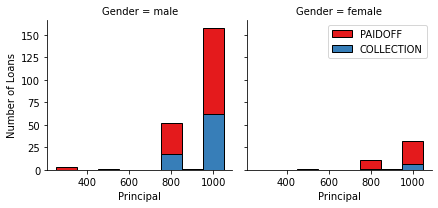

In [11]:
increment = 100  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'Principal'  # Column name to plot on x axis

binmin = int(df[xcolumn].min()//increment)*increment - center*increment/2
binmax = int((df[xcolumn].max()+1)//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()
plt.show()

Principal does not appear to be a great predictor, but might be useful in combination with other variables.

### Column 5: Terms
Examine the unique values:

In [12]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

And the distributions:

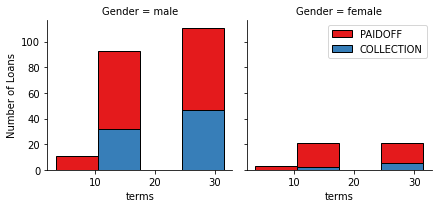

In [13]:
increment = 7  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'terms'  # Column name to plot on x axis

binmin = int(df[xcolumn].min()//increment)*increment - center*increment/2
binmax = int((df[xcolumn].max()+1)//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()
plt.show()

Short payment frequency loans seem to be paid off at a higher rate, but the number of samples is low; this may be significant or not.  Using a binary variable of weekly terms could be useful; The rates between biweekly and monthly do not seem significant.

### Column 6: Effective Date

What range of dates did these loans originate on?

In [14]:
print(f"First loan: {df['effective_date'].min()}")
print(f"Final loan: {df['effective_date'].max()}")
print(f"Span: {df['effective_date'].max().toordinal() - df['effective_date'].min().toordinal() + 1} days")
df['effective_date'].value_counts()

First loan: 2016-09-08 00:00:00
Final loan: 2016-09-14 00:00:00
Span: 7 days


2016-09-11    166
2016-09-12     87
2016-09-14     31
2016-09-10     31
2016-09-13     20
2016-09-09      8
2016-09-08      3
Name: effective_date, dtype: int64

So this data is only from a single week.  Not great for reliability - we'd probably want a year or month of data to have good averaging, but this can still work.

Let's examine distributions as above, paying attention to the target.

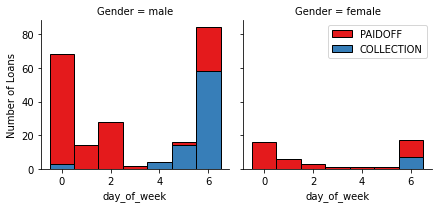

In [15]:
increment = 1  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
df2 = df.copy(deep=True)
df2['day_of_week'] = pd.DataFrame([x.dayofweek for x in df['effective_date']])
xcolumn = 'day_of_week'  # Column name to plot on x axis

binmin = int(df2[xcolumn].min()//increment)*increment - center*increment/2
binmax = int(df2[xcolumn].max()//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df2, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()

plt.show()

So in the preprocessing phase, let's examine and enable processing by days of the week.

### Column 7: Due Date

Let's examine the loan ending dates.

In [16]:
col = 'due_date'
print(f"First loan end: {df[col].min()}")
print(f"Final loan end: {df[col].max()}")
print(f"Span: {df[col].max().toordinal() - df[col].min().toordinal() + 1} days")
df[col].value_counts()

First loan end: 2016-09-16 00:00:00
Final loan end: 2016-11-12 00:00:00
Span: 58 days


2016-10-10    90
2016-09-25    63
2016-09-26    42
2016-10-11    36
2016-10-13    19
2016-10-09    18
2016-09-24    12
2016-09-27    11
2016-09-28    10
2016-10-12     6
2016-11-09     6
2016-10-08     5
2016-10-25     4
2016-11-10     4
2016-09-18     3
2016-09-23     3
2016-09-16     3
2016-09-19     3
2016-10-07     2
2016-09-17     2
2016-11-12     2
2016-10-26     1
2016-09-22     1
Name: due_date, dtype: int64

There is a wide range of due dates, but this is expected based on a range of start dates.

Does the day of the week a loan is due matter?

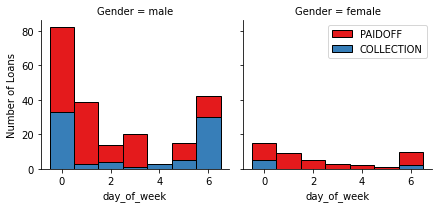

In [17]:
increment = 1  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
df2 = df.copy(deep=True)
df2['day_of_week'] = pd.DataFrame([x.dayofweek for x in df['due_date']])
xcolumn = 'day_of_week'  # Column name to plot on x axis

binmin = int(df2[xcolumn].min()//increment)*increment - center*increment/2
binmax = int(df2[xcolumn].max()//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df2, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()

plt.show()

This is similar but possibly less correlated than the origination date; likely one or the other could be chosen, but including both might not improve the model.

The due date is potentially more relevant in relation to the origination date, that is, the duration of the loan.  Let's look at the duration distributions.

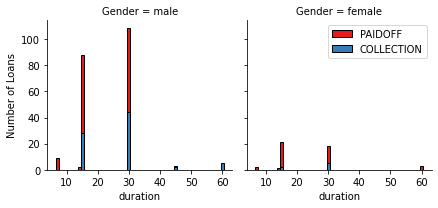

30    176
15    139
60     12
7      11
45      5
14      3
Name: duration, dtype: int64

In [18]:
increment = 1  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
df2 = df.copy(deep=True)
df2['start'] = pd.DataFrame([x.toordinal() for x in df['effective_date']])
df2['end'] = pd.DataFrame([x.toordinal() for x in df['due_date']])
df2['duration'] = round(df2['end']-df2['start']+1)
xcolumn = 'duration'  # Column name to plot on x axis

binmin = int(df2[xcolumn].min()//increment)*increment - center*increment/2
binmax = int(df2[xcolumn].max()//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df2, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()

plt.show()

df2['duration'].value_counts()

So loans are issued in durations of 1 or 2 weeks (7, 14 days), or multiples of 15 days (15, 30, 45, 60 days), with collection possibly at lower probability at shorter terms.

Is the duration equal to the terms?

In [19]:
sum(df['terms']!=df2['duration'])
df2.loc[df['terms']!=df2['duration']].head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,start,end,duration
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,736217,736246,30
35,42,42,PAIDOFF,1000,7,2016-09-11,2016-09-24,31,Bechalor,male,736218,736231,14
88,109,109,PAIDOFF,1000,7,2016-09-11,2016-09-24,29,college,male,736218,736231,14
90,111,111,PAIDOFF,1000,30,2016-09-11,2016-11-09,27,college,female,736218,736277,60
101,122,122,PAIDOFF,1000,15,2016-09-11,2016-10-25,20,college,male,736218,736262,45


No, they are not equal, but duration is a multiple of terms (as expected).  We can keep duration or we can divide by terms, which might make more sense.

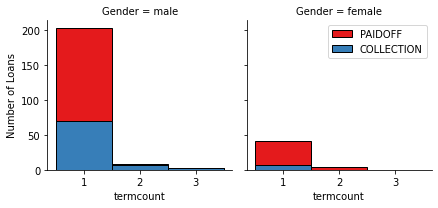

1    322
2     19
3      5
Name: termcount, dtype: int64

In [20]:
increment = 1  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
df2['termcount'] = [int(round(x/y)) for x,y in zip(df2['duration'],df['terms'])]
xcolumn = 'termcount'  # Column name to plot on x axis

binmin = int(df2[xcolumn].min()//increment)*increment - center*increment/2
binmax = int(df2[xcolumn].max()//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df2, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()

plt.show()

df2['termcount'].value_counts()

This is interesting, since male collection rates seem much higher at larger termcount.  However, the number of records for longer termcount is low, so this may not be a very reliable feature.  Let's include termcount as a possible feature.

### Column 8: Age

Let's perform the inspection as ususal:

In [21]:
df['age'].value_counts(sort=False)

18     1
19     2
20     3
21     5
22     7
23     8
24    14
25    16
26    29
27    25
28    24
29    27
30    27
31    19
32    14
33    17
34    20
35    20
36     9
37    11
38     9
39     8
40     8
41     2
42     3
43     3
44     4
45     4
46     2
47     1
50     3
51     1
Name: age, dtype: int64

No surprises here, let's look at the distributions coded by target.

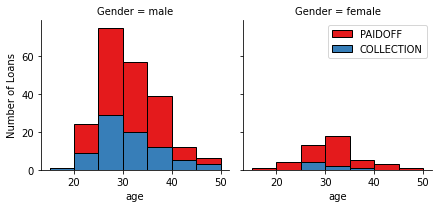

In [22]:
increment = 5  # Bin width
center = False    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'age'  # Column name to plot on x axis

binmin = int(df[xcolumn].min()//increment)*increment - center*increment/2
binmax = int((df[xcolumn].max()+1)//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()
plt.show()

Again no obvious trend, but that's what machine learning is for - there may be interactions with other predictors which supports its incorporation.

### Column 9: Education
Examine the values:

In [23]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

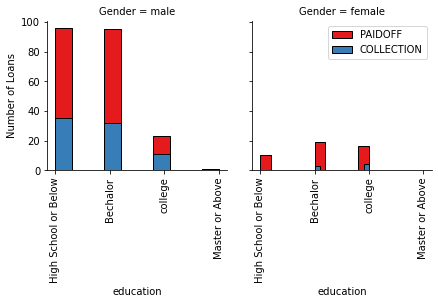

In [24]:
increment = 5  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'education'  # Column name to plot on x axis

nbins = len(df['education'].unique())
bins = np.linspace(-0.5, nbins+0.5, nbins+1)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')

for ax in g.axes.flat:
    ax.set_xticks(range(len(df['education'].unique())))
    ax.set_xticklabels(df['education'].unique(), rotation=90)

g.axes[-1].legend()
plt.show()

This predictor could be converted to one-hot encoded columns for modeling.  The lack of an entry for Master or Above for female could lead to it being a poor predictor, so it should probably be removed.

### Column 10: Gender

This has already been incorporated above in the analysis of the other variables, but let's look at it just to be sure.

In [25]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

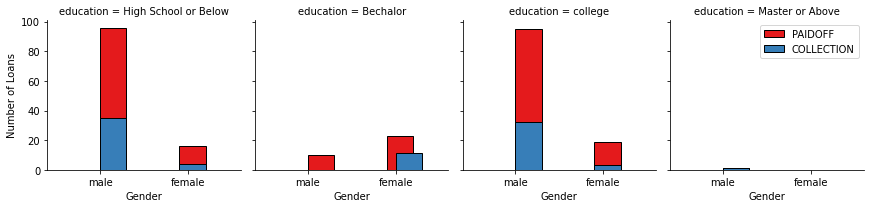

In [26]:
increment = 5  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'Gender'  # Column name to plot on x axis
barwidth = 0.3

nbins = len(df['Gender'].unique())
#bins = np.linspace(-barwidth/2, (nbins-1)+barwidth/2, nbins)
bins = np.linspace(0, nbins-1, nbins)

g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=4)
g.map(plt.hist, xcolumn, ec="k", width=barwidth)

g.axes.flat[0].set_ylabel('Number of Loans')

g.axes.flat[0].set_xticks(bins)
g.axes.flat[0].set_xticklabels(df[xcolumn].unique())

g.axes[-1].legend()
plt.show()

Gender can be converted to a binary column.  There's something wrong with the Seaborn plotting in the last two graphs, probably because hist is not meant to be used with categorical variables... it would be nice to resolve this in the future.

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 


N.B. Pandas.dt.dayofweek convention is Monday = 0 through Sunday = 6 (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html))


In [27]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

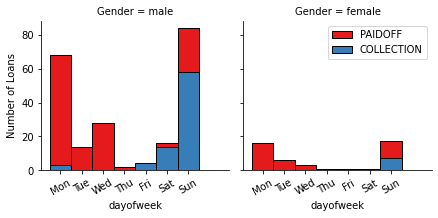

In [28]:
increment = 1  # Bin width
center = True    # Bins centered on multiples of increment (True) or delimited by multiples of increment (False)
xcolumn = 'dayofweek'  # Column name to plot on x axis

binmin = int(df[xcolumn].min()//increment)*increment - center*increment/2
binmax = int((df[xcolumn].max()+1)//increment)*increment + center*increment/2
nbins = round((binmax-binmin)/increment+1)
bins = np.linspace(binmin, binmax, nbins)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, xcolumn, bins=bins, ec="k")

g.axes.flat[0].set_ylabel('Number of Loans')
g.axes[-1].legend()

dayofweek_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for ax in g.axes.flat:
    ax.set_xticks(range(7))
    ax.set_xticklabels(dayofweek_labels, rotation=30)

plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use feature binarization to set a threshold value for Friday, Saturday and Sunday (days 4, 5, 6)

In [29]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Lets' add in loan term count (derived from loan duration)

In [30]:
df['start'] = pd.DataFrame([x.toordinal() for x in df['effective_date']])
df['end'] = pd.DataFrame([x.toordinal() for x in df['due_date']])
df['duration'] = df['end']-df['start']+1
df['termcount'] = [int(round(x/y)) for x,y in zip(df['duration'],df['terms'])]
df.drop(labels=['start','end','duration'],axis=1,inplace=True)
print(df['termcount'].value_counts())
df.head()

1    322
2     19
3      5
Name: termcount, dtype: int64


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,termcount
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1


#### And also the payment amount during each term (derived from principal and termcount)

1000.000000    235
800.000000      80
300.000000       3
500.000000      20
900.000000       2
400.000000       1
333.333333       5
Name: termamount, dtype: int64


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,termcount,termamount
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1,1000.0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,1000.0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1,1000.0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,1000.0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1,1000.0


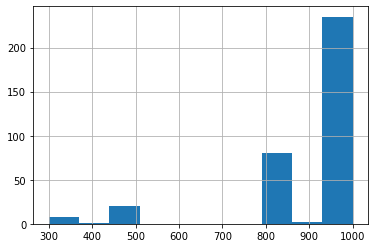

In [31]:
df['termamount'] = df['Principal']/df['termcount']
print(df['termamount'].value_counts(sort=False))
df['termamount'].hist()
df.head()

## Convert Categorical features to numerical values

Lets look at gender:

In [32]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [33]:
gender_dict = {0:'male', 1:'female'}
tx_dict = gender_dict
df['ind_gender'] = df['Gender'].replace(to_replace=list(tx_dict.values()), value=(tx_dict.keys()), inplace=False)
#df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,termcount,termamount,ind_gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1,1000.0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,1000.0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1,1000.0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,1000.0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1,1000.0,0


## One Hot Encoding  
#### How about education?

In [34]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [35]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [36]:
df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,termcount,termamount,ind_gender,Bechalor,High School or Below,Master or Above,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1,1000.0,0,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,1000.0,1,1,0,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1,1000.0,0,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,1000.0,1,0,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1,1000.0,0,0,0,0,1


#### Attempt to use education as an ordinal variable

Assume 'college' includes any college education, such that 'bachelor' is more educated because they have graduated from a full college program.

In [37]:
education_dict = {0:'High School or Below', 1:'college', 2:'Bechalor', 3:'Master or Above'}
tx_dict = education_dict
df['ind_education'] = df['education'].replace(to_replace=tx_dict.values(), value=tx_dict.keys(), inplace=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,termcount,termamount,ind_gender,Bechalor,High School or Below,Master or Above,college,ind_education
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1,1000.0,0,0,1,0,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,1000.0,1,1,0,0,0,2
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1,1000.0,0,0,0,0,1,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,1000.0,1,0,0,0,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1,1000.0,0,0,0,0,1,1


In [38]:
Feature = df[['Principal','terms','age','Gender','dayofweek','weekend','termcount','termamount']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.rename(columns={'Principal':'principal','Gender':'gender','Bechalor':'ed_bachelor','High School or Below':'ed_highschoolandbelow','college':'ed_college'},inplace=True)
Feature.head()
#Feature = Feature[['principal','terms','age','gender','dayofweek','weekend','ed_bachelor','ed_highschoolandbelow','ed_college']]

,principal,terms,age,gender,dayofweek,weekend,termcount,termamount,ed_bachelor,ed_highschoolandbelow,ed_college
0,1000,30,45,male,3,0,1,1000.0,0,1,0
1,1000,30,33,female,3,0,1,1000.0,1,0,0
2,1000,15,27,male,3,0,1,1000.0,0,0,1
3,1000,30,28,female,4,1,1,1000.0,0,0,1
4,1000,30,29,male,4,1,1,1000.0,0,0,1


### Feature selection

#### All features, selected and renamed if necessary:

In [39]:
X_all = df.copy(deep=True)
X_all.drop(['Unnamed: 0','Unnamed: 0.1','loan_status','effective_date','due_date','education','Gender'], axis=1, inplace=True)
X_all.rename(columns={'Principal':'principal','ind_gender':'gender','Bechalor':'ed_bachelor','High School or Below':'ed_highschoolandbelow','college':'ed_college','Master or Above':'ed_masterandabove','ind_education':'education'},inplace=True)
X_all.head()

,principal,terms,age,dayofweek,weekend,termcount,termamount,gender,ed_bachelor,ed_highschoolandbelow,ed_masterandabove,ed_college,education
0,1000,30,45,3,0,1,1000.0,0,0,1,0,0,0
1,1000,30,33,3,0,1,1000.0,1,1,0,0,0,2
2,1000,15,27,3,0,1,1000.0,0,0,0,0,1,1
3,1000,30,28,4,1,1,1000.0,1,0,0,0,1,1
4,1000,30,29,4,1,1,1000.0,0,0,0,0,1,1


#### Original features given by the default notebook:

In [40]:
X_orig = X_all.copy(deep=True)
X_orig.drop(['termcount','termamount','ed_masterandabove','education'], axis=1, inplace=True)
X_orig.head()

,principal,terms,age,dayofweek,weekend,gender,ed_bachelor,ed_highschoolandbelow,ed_college
0,1000,30,45,3,0,0,0,1,0
1,1000,30,33,3,0,1,1,0,0
2,1000,15,27,3,0,0,0,0,1
3,1000,30,28,4,1,1,0,0,1
4,1000,30,29,4,1,0,0,0,1


#### New features replacing redundant old ones:

In [41]:
X_new = X_all.copy(deep=True)
X_new.drop(['ed_bachelor','ed_highschoolandbelow','ed_masterandabove','ed_college'], axis=1, inplace=True)
X_new.head()

,principal,terms,age,dayofweek,weekend,termcount,termamount,gender,education
0,1000,30,45,3,0,1,1000.0,0,0
1,1000,30,33,3,0,1,1000.0,1,2
2,1000,15,27,3,0,1,1000.0,0,1
3,1000,30,28,4,1,1,1000.0,1,1
4,1000,30,29,4,1,1,1000.0,0,1


### Feature Set Summary

Parameters \ Feature Set | X_orig | X_new | X_all
---|---|---|---
principal | X | X | X
terms | X | X | X
age | X | X | X
dayofweek | X | X | X
weekend | X | X | X
gender | X | X | X
ed_highschoolandbelow | X |   | X
ed_college | X |   | X
ed_bachelor | X |   | X
ed_master_and_above |   |   | X
education (0-3) |   | X | X
termcount |   | X | X
termamount |   | X | X 



### Labels

Let's create four options, since I suspect some earlier autofitting issues are due to dataframe/series confusion...

     y_str is a Pandas dataframe with string entries
     y_ind is a Pandas dataframe with binary entries
     y_str_s is Pandas a series with string entries
     y_ind_s is Pandas a series with binary entries

In [42]:
y_str = df[['loan_status']].copy(deep=True)
print(y_str['loan_status'].value_counts())
y_str.head()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


In [43]:
# Binary assignment: see discussion under "Fit Metrics" below for a justification of this particular assignment
#  Note: the sklearn identification of 1=positive can be worked around by setting pos_label=0 (or otherwise) in the scoring metric given to make_scorer
y_dict = {1:'PAIDOFF', 0:'COLLECTION'}
y_ind = y_str[['loan_status']].replace(to_replace=list(y_dict.values()), value=(y_dict.keys()), inplace=False)
print(y_dict.values())
print(y_dict.keys())
print(y_ind['loan_status'].value_counts())
y_ind.head()

dict_values(['PAIDOFF', 'COLLECTION'])
dict_keys([1, 0])
1    260
0     86
Name: loan_status, dtype: int64


,loan_status
0,1
1,1
2,1
3,1
4,1


In [44]:
y_str_s = y_str['loan_status']
y_ind_s = y_ind['loan_status']

In [45]:
for x in [y_str, y_str_s, y_ind, y_ind_s, y_str.values, y_str_s.values, y_ind.values, y_ind_s.values]:
    print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Results of attempting fits with the above data options (Y = fit completes, N = error):

Variable | Description | Result | .values Result
---|---|---|---
y_str | DataFrame with string elements | N | N
y_ind | DataFrame with int elements | N | N
y_str_s | Series with string elements | N |N
y_ind_s | Series with int elements | Y | Y

In a simple grid evaluation using y_ind_s took on average 15.8 seconds while using y_ind_s.values took on average 14.0 seconds.

Because using y_ind_s takes 13% longer (presumably because conversions are done repeatedly for each evaluation), we will use y_ind_s.values as our input.

Furthermore, testing with X_all.values averaged 7.7 seconds vs. 14.0 with X_all (DataFrame, 82% longer), we should use only the numpy arrays returned in the .values attribute for evaluation (see the Environment Variables heading in the Classification section).

In the environment definition below, we will select y_train = y_ind_s.values for the fastest execution.

Note: A future warning (environment on Watson Studion is Python 3.7) indicated that string-labeled identification will be OK in future versions of Python/sklearn, but for now in Watson Studio we must binarize values.  Alternatively, we could set label_pos in the make_scorer function to the value we want interpreted as positive (e.g. for functions precision_score and f1_score)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

Note: This is instead incorporated into the train/test pipeline.

Example:

    X= preprocessing.StandardScaler().fit(X).transform(X)
    X[0:5]

# Classification 

First we will use the training set to build a accurate models, then we will usethe test set to report the accuracy of the models.
The following models will be used:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

Notice:
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

Note: Some markdown entries of model results use parameters (also recorded in markdown) that are supersceded.  The final version of code has shortened parameter lists in order to speed up execution.  The results are verified to be similar (several parameter sets result in similarly good fits, so only one set is solved for)

## Fit Metrics

Consider the condition for profitability of a lender over the course of a month, assuming loan amounts and outcomes are independent and therefore averageable:

$$
\begin{align}
\mbox{Net income from loans} &\gt \mbox{Expenses} \\
N_{proc}\,A\,P_{i}\,\left( P_{p} R_p - P_{c} \left( 1 - R_c \right) \right) &\gt B + C(N_{app},N_{proc}); N_{proc}\leq N_{app}
\end{align}
$$
where:<br>
$$
\begin{align}
N_{app} &\mbox{   is the number of loan applications received in a month}\\
N_{proc} &\mbox{   is the number of loans applications processed in a month}\\
A &\mbox{   is the average amount of a loan}\\
P_{i} &\mbox{   is the probability a loan will be issued}\\
P_{p} &\mbox{   is the probability an issued loan will be paid off}\\
R_p &\mbox{   is the interest as a fraction of prinicipal for the loan}\\
P_c &\mbox{   is the probability an issued loan will go into collection, } P_c = (1-P_p)\\
R_c &\mbox{   is the fraction of principal recovered from the collection process}\\
B &\mbox{   is the fixed business costs per month e.g. payroll, rent}\\
C(N_{app}, N_{proc}) &\mbox{   is the variable cost for processing N loans e.g. for overtime above a baseline number of applications}
\end{align}
$$

This is a simplistic equation that ignores the complexities of the loan origination and collection process, but should be sufficient for our purposes.<br>
Let us assume that all applications are processed, and that the processing occurs without additional costs.  Profitability then requires:

$$
N_{app}\,A\,P_{i}\,\left( P_{p} R_p - P_{c} \left( 1 - R_c \right) \right) \gt B \\
N_{app}\,A\,P_{i}\,\left( P_{p} R_p - \left(1-P_p\right) \left( 1 - R_c \right) \right) \gt B\\
N_{app}\,A\,P_{i}\,\left( P_{p} \left( 1 - R_c + R_p \right) - \left(1 - R_c\right) \right) \gt B\\
P_{i}\,\left( P_{p} - \frac{1}{1 + \frac{R_p}{1 - R_c}}\right) \gt \frac{B}{N_{app}A}\frac{1}{\left( 1 - R_c + R_p \right)}
$$

where we note $B/N_{app}A$ is the ratio of business expenses to total amount of loans applied for, and the equation is now dimensionless.

Maximizing profit requires maximizing both $P_i$ and $P_p$, and there is a tradeoff where increasing $P_i$ may add a larger proportion of loans that go into collection, decreasing $P_p$.  Ideally, we would have industry knowledge of or access to business records to compute $B$, $N_{app}$, $A$, $R_p$, and $R_c$.

Making some [informed guesses](https://www.responsiblelending.org/research-publication/fact-v-fiction-truth-about-payday-lending-industry-claims#five) at parameters, let $R_c$ be 65% and $R_p$ be 15%:

$$
P_{i}\,\left( P_{p} - 0.700\right) \gt 2\frac{B}{N_{app}A}
$$

In this case, if the lender considers application of an amount at least about 3 times its business expenses, and at least about 70% of its loans are paid off, it can be profitable.  These conditions seem like they could be easily met.  Indeed, the link above indicates ~94% of loans are paid off.

The above equation could be used to construct a scoring function for machine learning algorithms, maximizing the left side of the equation.  In lieu of this, we will see if there is a simpler scoring function which will be adquate for our purposes.

Assume the number of loans that would be paid off that are rejected because of a prediction that they will go into collection is of no consequence.

Assume the lender follows the results of the model and does not approve loans predicted to go into collection and approves loans predicted to be paid off (that is, $P_i$ and $P_p$ are as given by the model).

Consider the confusion matrix with elements abbreviated by TP, FP, FN, TN for counts of true positives, false positives, false negatives, and true negatives.  The positives and negatives may be defined in two ways:

---
###### Option 1:
Let loan_status = COLLECTION be 1 (true) and loan_status = PAIDOFF be 0 (false).<br>

The above condition for finanical viability has $P_i = (FN + TN)/N_{app}$ and $P_p = TN\:/\:(FN+TN)$.  The quantity $TN\:/\:(FN+TN)$ is known as the Negative Predictive Value $(NPV)$.  This function is not standard in module *sklearn.metrics*, though we could use *sklearn.metrics.make_scorer()* to create one.

---
###### Option 2:
Instead let loan_status = COLLECTION be 0 (false) and loan_status = PAIDOFF be 1 (true).<br>

The condition for financial viability now has $P_i = (FP+TP)/N_{app}$ and $P_p = TP\:/\:(FP+TP)$.  The quantity $TP\:/\:(FP+TP)$ is known as the Positive Predictive Value $(PPV)$ or Precision.  This function is standard in module *sklearn.metrics*.

---
###### Selection
We choose the Precision metric which comes built-in to *sklearn.metrics* - Option 2 where PAIDOFF = 1 and COLLECTION = 0.


### Scoring Function
We define a scoring function as a more accurate alternative to using Precision, according to the discussion above.

In [46]:
import numpy as np
from sklearn.metrics import make_scorer
def loan_scoring_function(y,yhat,Rp=0.15,Rc=0.65,recenter=False,**kwargs):
    '''Scoring function for loan issuance training
    
    Parameters
    ----------
    y: bool or {0,1} series-like 
        True y values
    yhat: bool or {0,1} series-like
        Predicted y values
    Rp: float [0,1]
        Average fraction of the principal of a loan that goes into collection that is recovered
    Rc: float [0,1]
        Average fraction of the principal of a loan that is collected as interest
    recenter: bool
        Whether to offset the scoring function to range [0,1] instead of its
        typical range [-C, 1-C], where C = 1/((1+Rp/(1-Rc))N) is the minimum
        Precision necessary for profitability
    
    Returns
    -------
    float [-inf,1]: Custom score: ((FP+TP)/N)((TP/(FP+TP)) - 1/(1+Rp/(1-Rc))) = (TP - (FP+TP)/(1+Rp/(1-Rc)))/N for N the number of samples
    '''
    yy = np.array(y)
    TP = sum(yy & yhat)
    FP = sum(~yy & yhat)
    return (TP-(FP+TP)/(1+Rp/(1-Rc)))/len(y) + (1/(1+Rp/(1-Rc)) if recenter else 0)

loan_scorer = make_scorer(loan_scoring_function, greater_is_better=True, needs_proba=False, needs_threshold=False, Rp=0.15, Rc=0.65, recenter=False)

### Utility Functions

In [47]:
def print_scores(scoring, results):
    '''Print best mean scores, standard deviation, and parameters for all metrics
    
    Parameters
    ----------
    scoring: dict of scoring functions (as supplied to GridSearchCV)
    results: dict of cross-validation results (as generated in GridSearchCV.cv_results_)
    
    Returns
    -------
    None
    
    TODO: instead of taking scoring as a parameter, find the score list by searching the results dict
    '''

    metricnamelen = 0
    for metric in scoring.keys():
        metricnamelen = len(metric) if len(metric)>metricnamelen else metricnamelen
    for metric in scoring.keys():
        bestindex = np.argmin(np.array(grid.cv_results_[f'rank_test_{metric}']))
        mean_opt = (grid.cv_results_[f'mean_test_{metric}'])[bestindex]
        std_opt = (grid.cv_results_[f'std_test_{metric}'])[bestindex]
        print(f"Best {metric:{metricnamelen}s} score {mean_opt:0.4f} +/- {std_opt:0.4f} found at {(grid.cv_results_['params'])[bestindex]}")

In [48]:
def reorder_GridSearchCV_results(results, param, new_param_order):
    '''Reorder the result matrix of a GridSearchCV for easier plotting
    
    Parameters
    ----------
    results: dict returned by GridSearchCV.cv_results_
        The grid search results that are to be reordered, not modified by this function
    param: dict or list of dicts
        The parameters given to GridSearchCV, ordered by the user
    new_param_order: list or list of lists
        The new index order, with unique elements being the indices spanning the values in param
        
    Returns
    -------
    A deep copy of results that is reordered according to new_param_order
    
    Description
    -----------
    The entries in results are reordered.  First, the results are sorted into blocks as if GridSearchCV
    were run with param_grid set to each dict in param, in the order they appear.  Second, within each block,
    the elements of new_param_order are taken one at a time, and used as indices into the keys of the param dict
    corresponding to that block. Third, each parameter thus found is varied in the order given by the param dict values.
    This regenerates the grid in each block with the parameters at indices appearing earlier in the new_param_order list
    varying at higher frequency.  This facilitates display of results.
    
    TODO: Option for returning only a subsection of results
    TODO: Automate the ordering of parameters to make the lines as smooth as possible (minimize adjacent sample variation, allow large steps)
    TODO: Convert asserts to give a better error message
    TODO: Option for copy or modify original
    
    NOTE: Search within results['params'] for a matching dict entry is done using PrettyPrinter.
        This is necessary because object comparison fails for dict equality testing
        (e.g. {'scale':StandardScaler()} values will not return true).  Fortunately pprint.pformat()
        will perform key sorting so order of keys will not matter for comparison.
    '''
    import numpy as np
    import copy
    from pprint import pformat
    from typing import cast
    
    # Coerce new_param_order to a list of lists, and param to a list of dicts,
    #  and ensure the number of elements in param and new_param_order match
    assert type(new_param_order)==list
    if type(new_param_order[0])!=list:
        new_param_order = [new_param_order]
    if type(param)==dict:
        param = [param]
    assert len(new_param_order)==len(param)
    for i in range(len(param)):
        assert len(new_param_order[i])==len(param[i])
        assert set(new_param_order[i])==set(range(len(param[i])))
    
    # Reorder param
    # NOTE: deepcopy will void comparisons for objects like sklearn.preprocessing.StandardScaler()
    #  Copy will work instead, but exposes the original object to modification, so below we will work around
    #  the difficulties of a deepcopy using pprint as an object serializer
    newparam = []
    for pdict, neworder in zip(param, new_param_order):
        newdict = {}
        for (k, v) in [(list(pdict.keys())[x], list(pdict.values())[x]) for x in neworder]:
            newdict[k] = copy.deepcopy(v)
        newparam.append(newdict)

    # Create a searchable list of strings corresponding to results['params']
        # Example of necessity:
        #  from sklearn.preprocessing import StandardScaler
        #  z1={'a':1,'b':2,'c':StandardScaler()}
        #  z2={'c':StandardScaler(),'b':2,'a':1}
        #  print(z1) ->{'a': 1, 'b': 2, 'c': StandardScaler()}
        #  print(z2) ->{'c': StandardScaler(), 'b': 2, 'a': 1}
        #  print(z1==z2) ->False
        #  print(str(z1)==str(z2)) ->False
        #  z3 = z1.copy()
        #  print(z1==z3) ->True
        #  import copy
        #  z4 = copy.deepcopy(z1)
        #  print(z1==z4) ->False
        #  from pprint import pformat
        #  print(pformat(z1)==pformat(z2)) ->True
    results_params_strlist = []
    for rp in results['params']:
        results_params_strlist.append(pformat(rp))
        
    # Note that GridSearchCV will not recompute parameter sets that are duplicated in multiple grids in the
    #  grid list, so for proper display we will duplicate the results from duplicated parameter sets into
    #  the output dict by flattening param in the specified new_param_order and finding the corresponding
    #  index in results.
    newind = []
    newresultparams = []
    for pdict, neworder in zip(param,new_param_order):
        # Find the number of elements total in the grid
        numel = np.prod([len(x) for x in pdict.values()])
        
        # Find the number of elements for each parameter in pdict, in pdict order
        pdict_numels = []
        for val in pdict.values(): # Dict ordering guaranteed to be insertion order as of Python 3.7 (Feb 2020)
            pdict_numels.append(len(val))
        
        # Rearrange pdict_numel to return order
        pdict_numels = [pdict_numels[x] for x in neworder]
                
        # Make a list of index tuples for each gridpoint in return order
        indices_list = np.unravel_index([x for x in range(numel)], pdict_numels, order='F')
        indices_list = [x for x in zip(*indices_list)]
        
        # Find the index in results corresponding to each set of indices in indices_list
        for indices in indices_list:
            search_dict = {}
            # Construct a param dict to search for
            for k, index in enumerate(indices):
                search_dict[list(pdict.keys())[neworder[k]]] = list(list(pdict.values())[neworder[k]])[index]
            newind.append(results_params_strlist.index(pformat(search_dict)))
            # All points in the grids should be spanned by GridSearchCV, so this lookup should not fail...
            newresultparams.append(copy.deepcopy(search_dict))
        
    
    # Create a rearranged output dict
    ret = {}
    for key in results.keys():
        ret[key] = copy.deepcopy(np.take(results[key],newind))
        casttype = type(results[key])
        ret[key] = cast(casttype,ret[key])
    ret['params'] = newresultparams
    casttype = type(results['params'])
    ret['params'] = cast(casttype,ret['params'])
    
    return ret, newparam

In [49]:
def display_GridSearchCV_results(grid_results, grid_param, scoring, modeltype='', reorder = None):
    '''Displays plots the mean scores (with standard deviation and best metric) of a flattened GridSearchCV
    
    Parameters
    ----------
    grid_results: dict as exposed at GridSearchCV.cv_results_
    grid_param: dict sent to GridSearchCV as param_grid
    scoring: dict sent to GridSearchCV as scoring
    modeltype: str name of model type to display in plot title
    reorder: list or list of lists the same shape as param with unique elements the indices of param entries
        specifying how to reorder param for flattened display, with earlier elements iterated first
    
    Returns
    -------
    None
    
    TODO: get scoring from inspecting results instead of from a parameter
    '''
    
    if (reorder != None) and (reorder != [x for x in range(len(reorder))]):
        results, param = reorder_GridSearchCV_results(grid_results, grid_param, reorder)
    else:
        if reorder==None:
            reorder = []
            for pdict in grid_param:
                reorder.append([x for x in range(len(pdict.keys()))])
        if type(reorder[0])!=list:
            reorder = [reorder]
        if type(grid_param)==dict:
            param = [grid_param]
        results = grid_results

    # TODO; Update this reordering to be compatible with multiple grids... should be done for ls?
    xs = [x for x in range(len(results['params']))] # index for parameter list display
    #ls = [str(list(x.values())) for x in results['params']]
    #ls = [str([list(x.values())[y] for y in reorder]) for x in results['params']] # string representation for parameter list display
    ls = [str(list(x.values())) for x in results['params']] # string representation for parameter list display

    plt.figure(figsize=(14,12))
    ax = plt.gca()

    colors = [cm.hsv(x/(len(scoring.keys()))) for x in range(len(scoring.keys()))]
    
    for i, metric, color in zip(range(len(scoring.keys())),
                                scoring.keys(),
                                colors):
        for k, (plottype, linetype, linealpha, fillalpha) in enumerate(zip(['train','test'],
                                                                           [':','-'],
                                                                           [0.5,1],
                                                                           [0,0.1])):
            # Use newind to get the reindexed variables of interest
            plot_mean = results[f'mean_{plottype}_{metric}']
            plot_std = results[f'std_{plottype}_{metric}']
            lblsuffix = " (1 $\sigma$ range)" if plottype=="test" else ""
            ax.plot(xs, plot_mean, linetype, color=color, alpha=linealpha, label=f'{metric} {plottype.capitalize()} Mean{lblsuffix}')
            ax.fill_between(xs, plot_mean - plot_std, plot_mean + plot_std, color=color,alpha=fillalpha, label='')
            if plottype=='test':
                ind_opt = np.argmin(results[f'rank_{plottype}_{metric}'])
                ax.plot(xs[ind_opt], plot_mean[ind_opt], label=f'{metric} {plottype.capitalize()} Max Score ({plot_mean[ind_opt]:.3f}, param index={xs[ind_opt]})', marker='o', color=colors[i], markeredgecolor='black')
                ax.plot((xs[ind_opt],)*2, (0, plot_mean[ind_opt]), ':', color='black', alpha=0.5, label='')
                ax.annotate(f'{plot_mean[ind_opt]:0.3f}, {metric}, index {xs[ind_opt]}, {ls[ind_opt]}', (xs[ind_opt],plot_mean[ind_opt]))

    plt.title(f"GridSearchCV{(' evaluating ' + modeltype) if len(modeltype)>0 else ''}",fontsize=16)
    # TODO: Update x labeling for param as a list of dicts
    plabel = []
    for pdict in param:
        plabels = [x if x.find('__')==-1 else x.split('__',1)[1] for x in pdict.keys()]
        plabelslen = [len(x) for x in pdict.values()]
        plabel.append(f'\n{[(x,y) for x,y in zip(plabels, plabelslen)]}')
    plt.xlabel(f"Parameters Index\nfor flattened grids described by (variables,counts) in order of variation:{''.join(plabel)}",fontsize=14)
    plt.ylabel("Score",fontsize=14)            
    #ax.set_xticks(xs)
    #ax.set_xticklabels(ls, rotation=90, fontsize=8)
    ax.set_yticks(np.arange(0,1.05,0.05))
    ax.set_ylim(0,1)
    ax.set_xlim(min(xs),max(xs))
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left')
    ax.grid(True, axis='y')

### Environment Variables

These will be used across solves to standardize the fitting process

In [50]:
# GridSearchCV n_jobs; -1=all processors, 6=optimal for laptop development
ENV_NJOBS = -1

# Cross-validator parameters, for identical initialization
ENV_CV = RepeatedKFold # RepeatedStratifiedKFold
ENV_NSPLITS = 5
ENV_NREPEATS = 10
ENV_RANDOMSTATE = 0

# GridSearchCV parameters
SCORING = {'Max Profit':loan_scorer,
           'Precision':'precision',
           'Recall':'recall',
           'Accuracy':'accuracy',
           'Balanced':'balanced_accuracy',
           'F1':'f1',
           'Jaccard':'jaccard',
           'ROC':'roc_auc',
           '-LogLoss':'neg_log_loss'}
# Explicitly populate SCORING with scorers, so that we can iterate over scorer values
#  (note the needs_threshold parameter can be used to find predict_proba based scoring)
#  (also __class__ can discriminate sklearn.metrics._scorer._PredictScorer or _ProbaScorer)
for k, v in SCORING.items():
    if type(v)==str:
        SCORING[k] = get_scorer(v)
REFIT = 'Max Profit'

# Fit Results Summary data structure
#  Dict:
#   key:'name', the display name of the model (lets models be easily overwritten or new modeld incorporated)
#   value:{
#   'pipe_input': string for constructing a new pipeline
#   'param': parameters for the pipeline
#   'results': GridSearchCV.cv_results_
#   'scoring': optionally reduced SCORING used to generate the GridSearchCV.cv_results_, may need to eliminate some entries from SCORING e.g. proba methods.  To get the base scoring function use scorefun = sklearn.metrics.get_scorer(str)._score_func
#   'best_indices': dict with same keys as scoring and values of the index of parameters results['params'] which are optimal for the key scoring function
RESULTS = {}

# Data to fit to
X_train = X_all.values
y_train = y_ind_s.values

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [52]:
%%time

# Model name, e.g. for display of results
model_name = 'K Nearest Neighbor'

# Define the processing pipeline
pipe_input = [('scale',StandardScaler()), ('model',KNeighborsClassifier())]

# Define scoring specific to this model
scoring = SCORING.copy()
scoring.pop('-LogLoss',None)

# Parameters for fitting grid.  With Pipeline you must prefix a parameter with the pipe item name and two underscores
param = {
        'model__n_neighbors':[x for x in range(3,8,1)],
        'model__weights':['uniform'],#,'distance'],
        'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
        'model__p':[1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
        }

# Instantiate search grid and perform the fit
pipe = Pipeline(pipe_input)
cv = ENV_CV(n_splits=ENV_NSPLITS, n_repeats=ENV_NREPEATS, random_state=ENV_RANDOMSTATE)
grid = GridSearchCV(pipe, param_grid=param, scoring=scoring, refit=REFIT, cv=cv, return_train_score=True, error_score=np.NaN, n_jobs=ENV_NJOBS)
grid.fit(X_train,y_train)

# Add an entry to RESULTS
RESULTS[model_name] = {'pipe_input':pipe_input,
                       'param':param,
                       'results':grid.cv_results_,
                       'scoring':scoring,
                       'best_indices':{metric:np.argmin(np.array(grid.cv_results_[f'rank_test_{metric}'])) for metric in scoring.keys()}
                      }

# Print the best scores and parameters for all scoring methods selected
print_scores(scoring, grid.cv_results_)

Best Max Profit score 0.0917 +/- 0.0342 found at {'model__n_neighbors': 4, 'model__p': 8, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
Best Precision  score 0.8304 +/- 0.0507 found at {'model__n_neighbors': 4, 'model__p': 8, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
Best Recall     score 0.8905 +/- 0.0535 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'uniform', 'scale': RobustScaler()}
Best Accuracy   score 0.7330 +/- 0.0538 found at {'model__n_neighbors': 5, 'model__p': 10, 'model__weights': 'uniform', 'scale': StandardScaler()}
Best Balanced   score 0.6488 +/- 0.0682 found at {'model__n_neighbors': 4, 'model__p': 8, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
Best F1         score 0.8318 +/- 0.0292 found at {'model__n_neighbors': 7, 'model__p': 9, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
Best Jaccard    score 0.7131 +/- 0.0428 found at {'model__n_neighbors': 7, 'model__p': 9, 'model__weights': 'uniform', 'scale': MinMa

In [53]:
# Save the results of the fit for later use
grid_knc = grid
grid_knc_results = grid.cv_results_
pipe_knc_opt = grid.best_estimator_

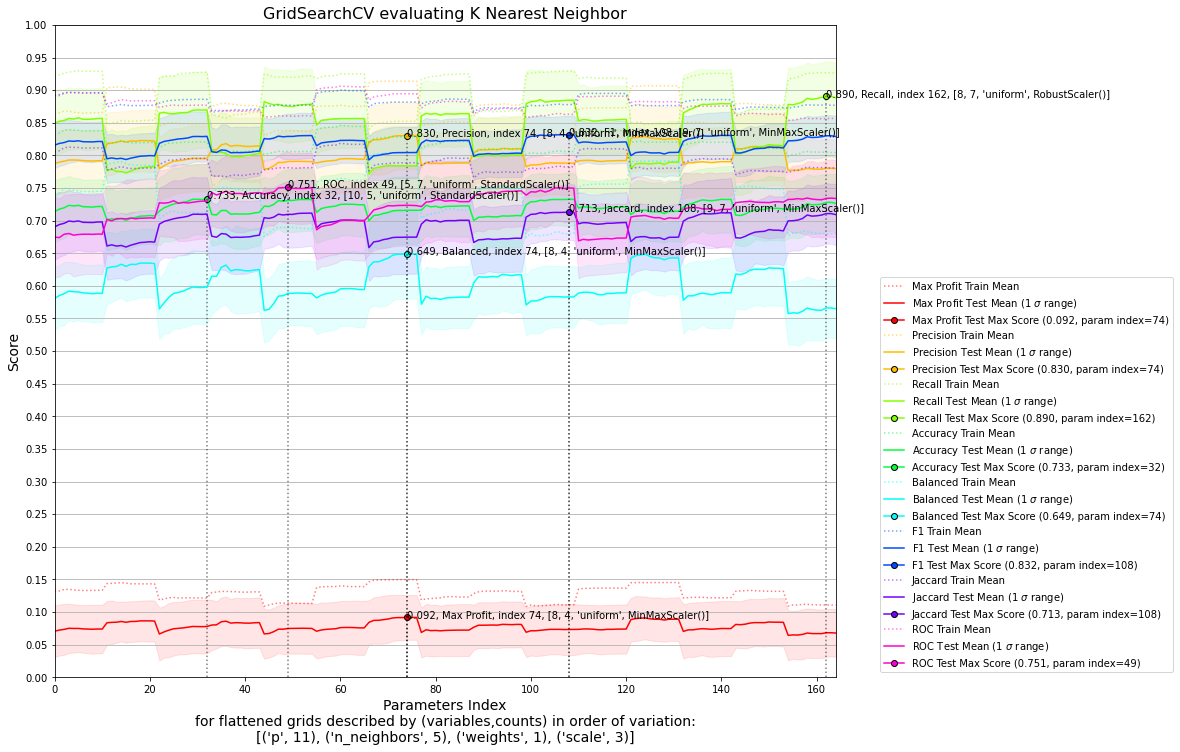

In [54]:
# Plot the results
display_GridSearchCV_results(grid_knc_results, param, scoring, modeltype='K Nearest Neighbor',reorder=[3,0,1,2])

## Optimization: K-Nearest Neighbors

### Parameters for Round 1

    estimator = Pipeline([('scale',StandardScaler()), ('model',KNeighborsClassifier())])
    param = {
            'model__n_neighbors':[x for x in range(1,20,2)],
            'model__weights':['uniform','distance'],
            'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
            'model__p':np.concatenate([np.arange(1,2,0.25),np.arange(2,4,0.5),np.arange(4,6,1),np.arange(6,8,2)])
            }
    cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=0)

#### Results for Round 1

Feature Set \ Evaluator | Wall Time | Best Precision | Best Parameters
---|---|---|---
X_orig | 39min 48s | 0.8032 | {'model__n_neighbors': 7, 'model__p': 6.0, 'model__weights': 'distance', 'scale': MinMaxScaler()}
X_new | 44min 28s | 0.8122 | {'model__n_neighbors': 3, 'model__p': 6.0, 'model__weights': 'distance', 'scale': RobustScaler()}
X_all | 47min 8s | 0.8169 | {'model__n_neighbors': 3, 'model__p': 6.0, 'model__weights': 'distance', 'scale': RobustScaler()}

Based on the previous results, we see that k is generally optimum in the range 3-7, that distance weighting is generally preferred, and that results trend higher with p - let's expand p in case the upward trend continues.

### Parameters for Round 2

    estimator = Pipeline([('scale',StandardScaler()), ('model',KNeighborsClassifier())])
    param = {
            'model__n_neighbors':[x for x in range(2,8,1)],
            'model__weights':['distance'],
            'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
            'model__p':np.concatenate([.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100])
            }
    cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=0)

#### Results for Round 2

Feature Set \ Evaluator | Wall Time | Best Precision | Best Parameters
---|---|---|---
X_orig | 13min 2s | 0.8039 | {'model__n_neighbors': 7, 'model__p': 20, 'model__weights': 'distance', 'scale': MinMaxScaler()}
X_new | 12min 54s | 0.8193 | {'model__n_neighbors': 4, 'model__p': 3, 'model__weights': 'distance', 'scale': RobustScaler()}
X_all | 15min 48s | 0.8199 | {'model__n_neighbors': 4, 'model__p': 2, 'model__weights': 'distance', 'scale': RobustScaler()}

The number of nearest neighbors k=4 is strongly preferred.  The use of features along with their derived features in X_all should be re-examined in the future.  Further optimization could be achieved with adjusting the scaling parameters on a per-parameter basis, though that may be getting into overfitting .

#### Parameters for Round 3

    estimator = Pipeline([('scale',StandardScaler()), ('model',KNeighborsClassifier())])
    param = {
            'model__n_neighbors':[x for x in range(3,8,1)],
            'model__weights':['distance'],
            'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
            'model__p':[1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
            }
    cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=0)

#### Results for Round 3 (after adding the custom scoring function)

Feature Set \ Evaluator | Wall Time | Best Custom | Best Precision | Best Parameters
---|---|---|---|---
X_orig | 13min 16s | 0.0789 | 0.8051 | {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
X_new | 12min 33s | 0.0877 | 0.8156 | {'model__n_neighbors': 4, 'model__p': 3, 'model__weights': 'distance', 'scale': RobustScaler()}
X_all | 8min 5s | 0.0885 | 0.8180 | {'model__n_neighbors': 4, 'model__p': 2, 'model__weights': 'distance', 'scale': RobustScaler()}

###### X_orig:
    Best Custom    score 0.0789 +/- 0.0567 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best Precision score 0.8051 +/- 0.0762 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best Recall    score 0.8207 +/- 0.0697 found at {'model__n_neighbors': 7, 'model__p': 4, 'model__weights': 'distance', 'scale': StandardScaler()}
    Best Accuracy  score 0.7116 +/- 0.0726 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best Balanced  score 0.6102 +/- 0.0941 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best F1        score 0.8076 +/- 0.0548 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best Jaccard   score 0.6807 +/- 0.0761 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': MinMaxScaler()}
    Best ROC       score 0.6771 +/- 0.0965 found at {'model__n_neighbors': 7, 'model__p': 4, 'model__weights': 'distance', 'scale': MinMaxScaler()}

###### X_new:
    Best Custom    score 0.0877 +/- 0.0552 found at {'model__n_neighbors': 4, 'model__p': 3, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Precision score 0.8156 +/- 0.0731 found at {'model__n_neighbors': 4, 'model__p': 3, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Recall    score 0.8522 +/- 0.0718 found at {'model__n_neighbors': 7, 'model__p': 10, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Accuracy  score 0.7304 +/- 0.0702 found at {'model__n_neighbors': 4, 'model__p': 2.5, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Balanced  score 0.6339 +/- 0.0920 found at {'model__n_neighbors': 4, 'model__p': 3, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best F1        score 0.8231 +/- 0.0525 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Jaccard   score 0.7028 +/- 0.0761 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best ROC       score 0.7071 +/- 0.0998 found at {'model__n_neighbors': 7, 'model__p': 9, 'model__weights': 'distance', 'scale': MinMaxScaler()}

###### X_all:
    Best Custom    score 0.0885 +/- 0.0545 found at {'model__n_neighbors': 4, 'model__p': 2, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Precision score 0.8180 +/- 0.0729 found at {'model__n_neighbors': 4, 'model__p': 2, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Recall    score 0.8515 +/- 0.0712 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Accuracy  score 0.7295 +/- 0.0708 found at {'model__n_neighbors': 7, 'model__p': 6, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Balanced  score 0.6365 +/- 0.0923 found at {'model__n_neighbors': 4, 'model__p': 2, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best F1        score 0.8231 +/- 0.0524 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best Jaccard   score 0.7028 +/- 0.0764 found at {'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()}
    Best ROC       score 0.7155 +/- 0.0973 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'distance', 'scale': MinMaxScaler()}

#### Parameters for Round 4 (extended X_all evaluation)

    estimator = Pipeline([('scale',StandardScaler()), ('model',KNeighborsClassifier())])
    param = {
            'model__n_neighbors':[x for x in range(3,8,1)],
            'model__weights':['uniform','distance'],
            'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
            'model__p':[1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
            }
    cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=0)

### Results for Round 4

This round is shortened in the interest of time

Feature Set \ Evaluator | Wall Time | Best Custom | Best Precision | Best Parameters
---|---|---|---|---
X_all | 17min 57s | 0.0959 | 0.8350 | {'model__n_neighbors': 4, 'model__p': 6, 'model__weights': 'uniform', 'scale': MinMaxScaler()}

random_state = 0

    Best Custom    score 0.0959 +/- 0.0493 found at {'model__n_neighbors': 4, 'model__p': 6, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Precision score 0.8350 +/- 0.0691 found at {'model__n_neighbors': 4, 'model__p': 6, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Recall    score 0.8972 +/- 0.0615 found at {'model__n_neighbors': 7, 'model__p': 10, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Accuracy  score 0.7478 +/- 0.0657 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Balanced  score 0.6601 +/- 0.0911 found at {'model__n_neighbors': 4, 'model__p': 6, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best F1        score 0.8405 +/- 0.0466 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Jaccard   score 0.7277 +/- 0.0689 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best ROC       score 0.7565 +/- 0.0783 found at {'model__n_neighbors': 7, 'model__p': 9, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Wall time: 17min 57s

random_state = 42

    Best Custom    score 0.0952 +/- 0.0506 found at {'model__n_neighbors': 4, 'model__p': 5, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Precision score 0.8343 +/- 0.0720 found at {'model__n_neighbors': 4, 'model__p': 5, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Recall    score 0.8939 +/- 0.0613 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': RobustScaler()}
    Best Accuracy  score 0.7430 +/- 0.0708 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Balanced  score 0.6603 +/- 0.0915 found at {'model__n_neighbors': 4, 'model__p': 5, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best F1        score 0.8373 +/- 0.0503 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best Jaccard   score 0.7233 +/- 0.0740 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Best ROC       score 0.7568 +/- 0.0866 found at {'model__n_neighbors': 7, 'model__p': 7, 'model__weights': 'uniform', 'scale': MinMaxScaler()}
    Wall time: 19min 1s

### Conclusions

We see a strong oscillation in the scores for odd k vs. even k; likely an odd k is preferred as a tie breaker.  In the case of most scoring methods, tie breaking by an odd data point results in an improved score, but for our custom score that is not the case.  I suppose that in cases of ambiguity, assigning in the default way for the classifier in case of a tie is better.

By comparing X_all results for rounds 2, 3, and 4 we see that removing parameter 'uniform' from consideration was a mistake costing 1% in the Custom score and 1.5% in the Precision score (our two most important scores).

Let's take the optimal model as the X_all row in the results for Round 4:

    {'model__n_neighbors': 4, 'model__p': 5, 'model__weights': 'uniform', 'scale': MinMaxScaler()}

# Decision Tree

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [56]:
%%time

# Model name, e.g. for display of results
model_name = 'Decision Tree'

# Define the processing pipeline
pipe_input = [('model',DecisionTreeClassifier())]

# Define scoring specific to this model
scoring = SCORING.copy()
scoring.pop('-LogLoss',None)

# Parameters for fitting grid.  With Pipeline you must prefix a parameter with the pipe item name and two underscores
param = {'model__criterion':['gini','entropy'],
         'model__max_depth':[x for x in range(1,9)],
         'model__class_weight':['balanced',None],
         'model__min_samples_split':[x for x in range(2,11,2)],
         'model__min_samples_leaf':[x for x in range(1,6)]
        }

# Instantiate search grid and perform the fit
pipe = Pipeline(pipe_input)
cv = ENV_CV(n_splits=ENV_NSPLITS, n_repeats=ENV_NREPEATS, random_state=ENV_RANDOMSTATE)
grid = GridSearchCV(pipe, param_grid=param, scoring=scoring, refit=REFIT, cv=cv, return_train_score=True, error_score=np.NaN, n_jobs=ENV_NJOBS)
grid.fit(X_train,y_train)

# Add an entry to RESULTS
RESULTS[model_name] = {'pipe_input':pipe_input,
                       'param':param,
                       'results':grid.cv_results_,
                       'scoring':scoring,
                       'best_indices':{metric:np.argmin(np.array(grid.cv_results_[f'rank_test_{metric}'])) for metric in scoring.keys()}
                      }

# Print the best scores and parameters for all scoring methods selected
print_scores(scoring, grid.cv_results_)

Best Max Profit score 0.1196 +/- 0.0170 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Precision  score 0.9797 +/- 0.0235 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Recall     score 1.0000 +/- 0.0000 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Accuracy   score 0.7515 +/- 0.0431 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Balanced   score 0.7611 +/- 0.0349 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best F1         score 0.857

In [57]:
# Save the results of the fit for later use
grid_dtc = grid
grid_dtc_results = grid.cv_results_
pipe_dtc_opt = grid.best_estimator_

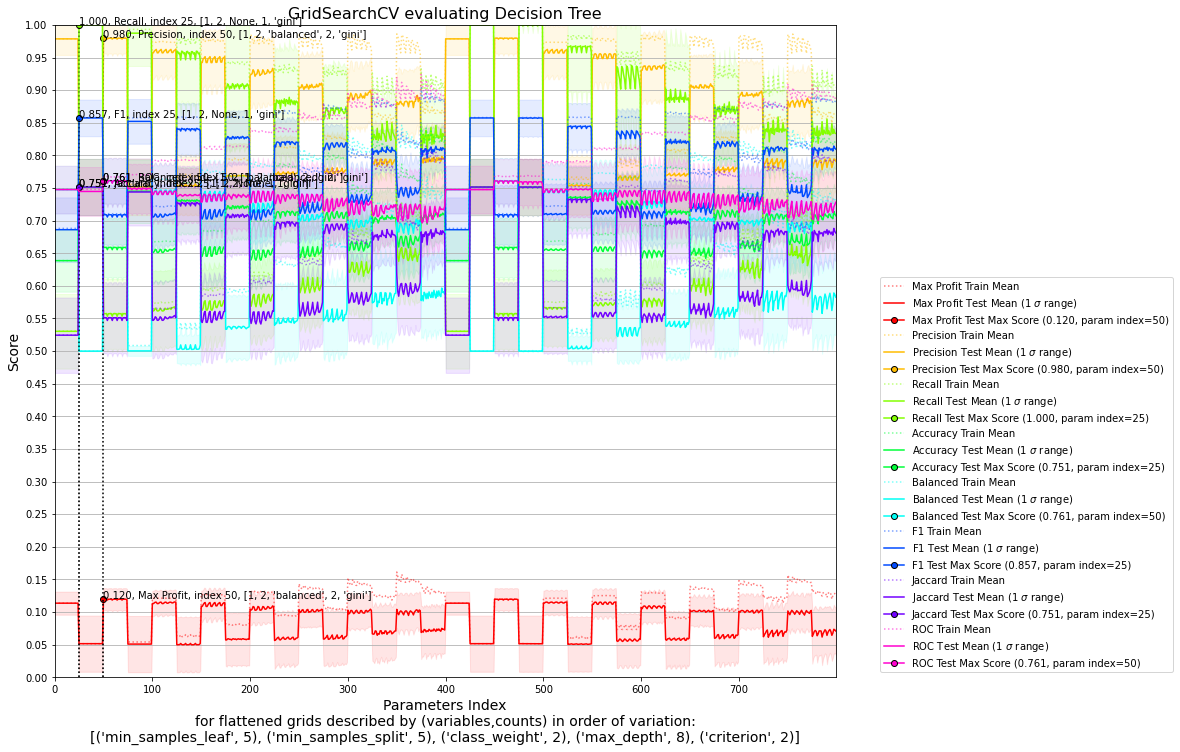

In [58]:
# Plot the results
display_GridSearchCV_results(grid_dtc_results, param, scoring, modeltype='Decision Tree',reorder=[4,3,2,1,0])

#### Print a text version of the decision tree

Note that pipelines don't play well with these export functions, hence the explicit fitting

In [61]:
grid.best_estimator_.steps[0][1].fit(X_train,y_train)
print(tree.export_text(grid.best_estimator_.steps[0][1]))

|--- feature_3 <= 3.50
|   |--- feature_11 <= 0.50
|   |   |--- class: 1
|   |--- feature_11 >  0.50
|   |   |--- class: 1
|--- feature_3 >  3.50
|   |--- feature_1 <= 11.00
|   |   |--- class: 1
|   |--- feature_1 >  11.00
|   |   |--- class: 0



#### Plot the decision tree as a graphic
Note that pipelines don't play well with these export functions, hence the explicit fitting

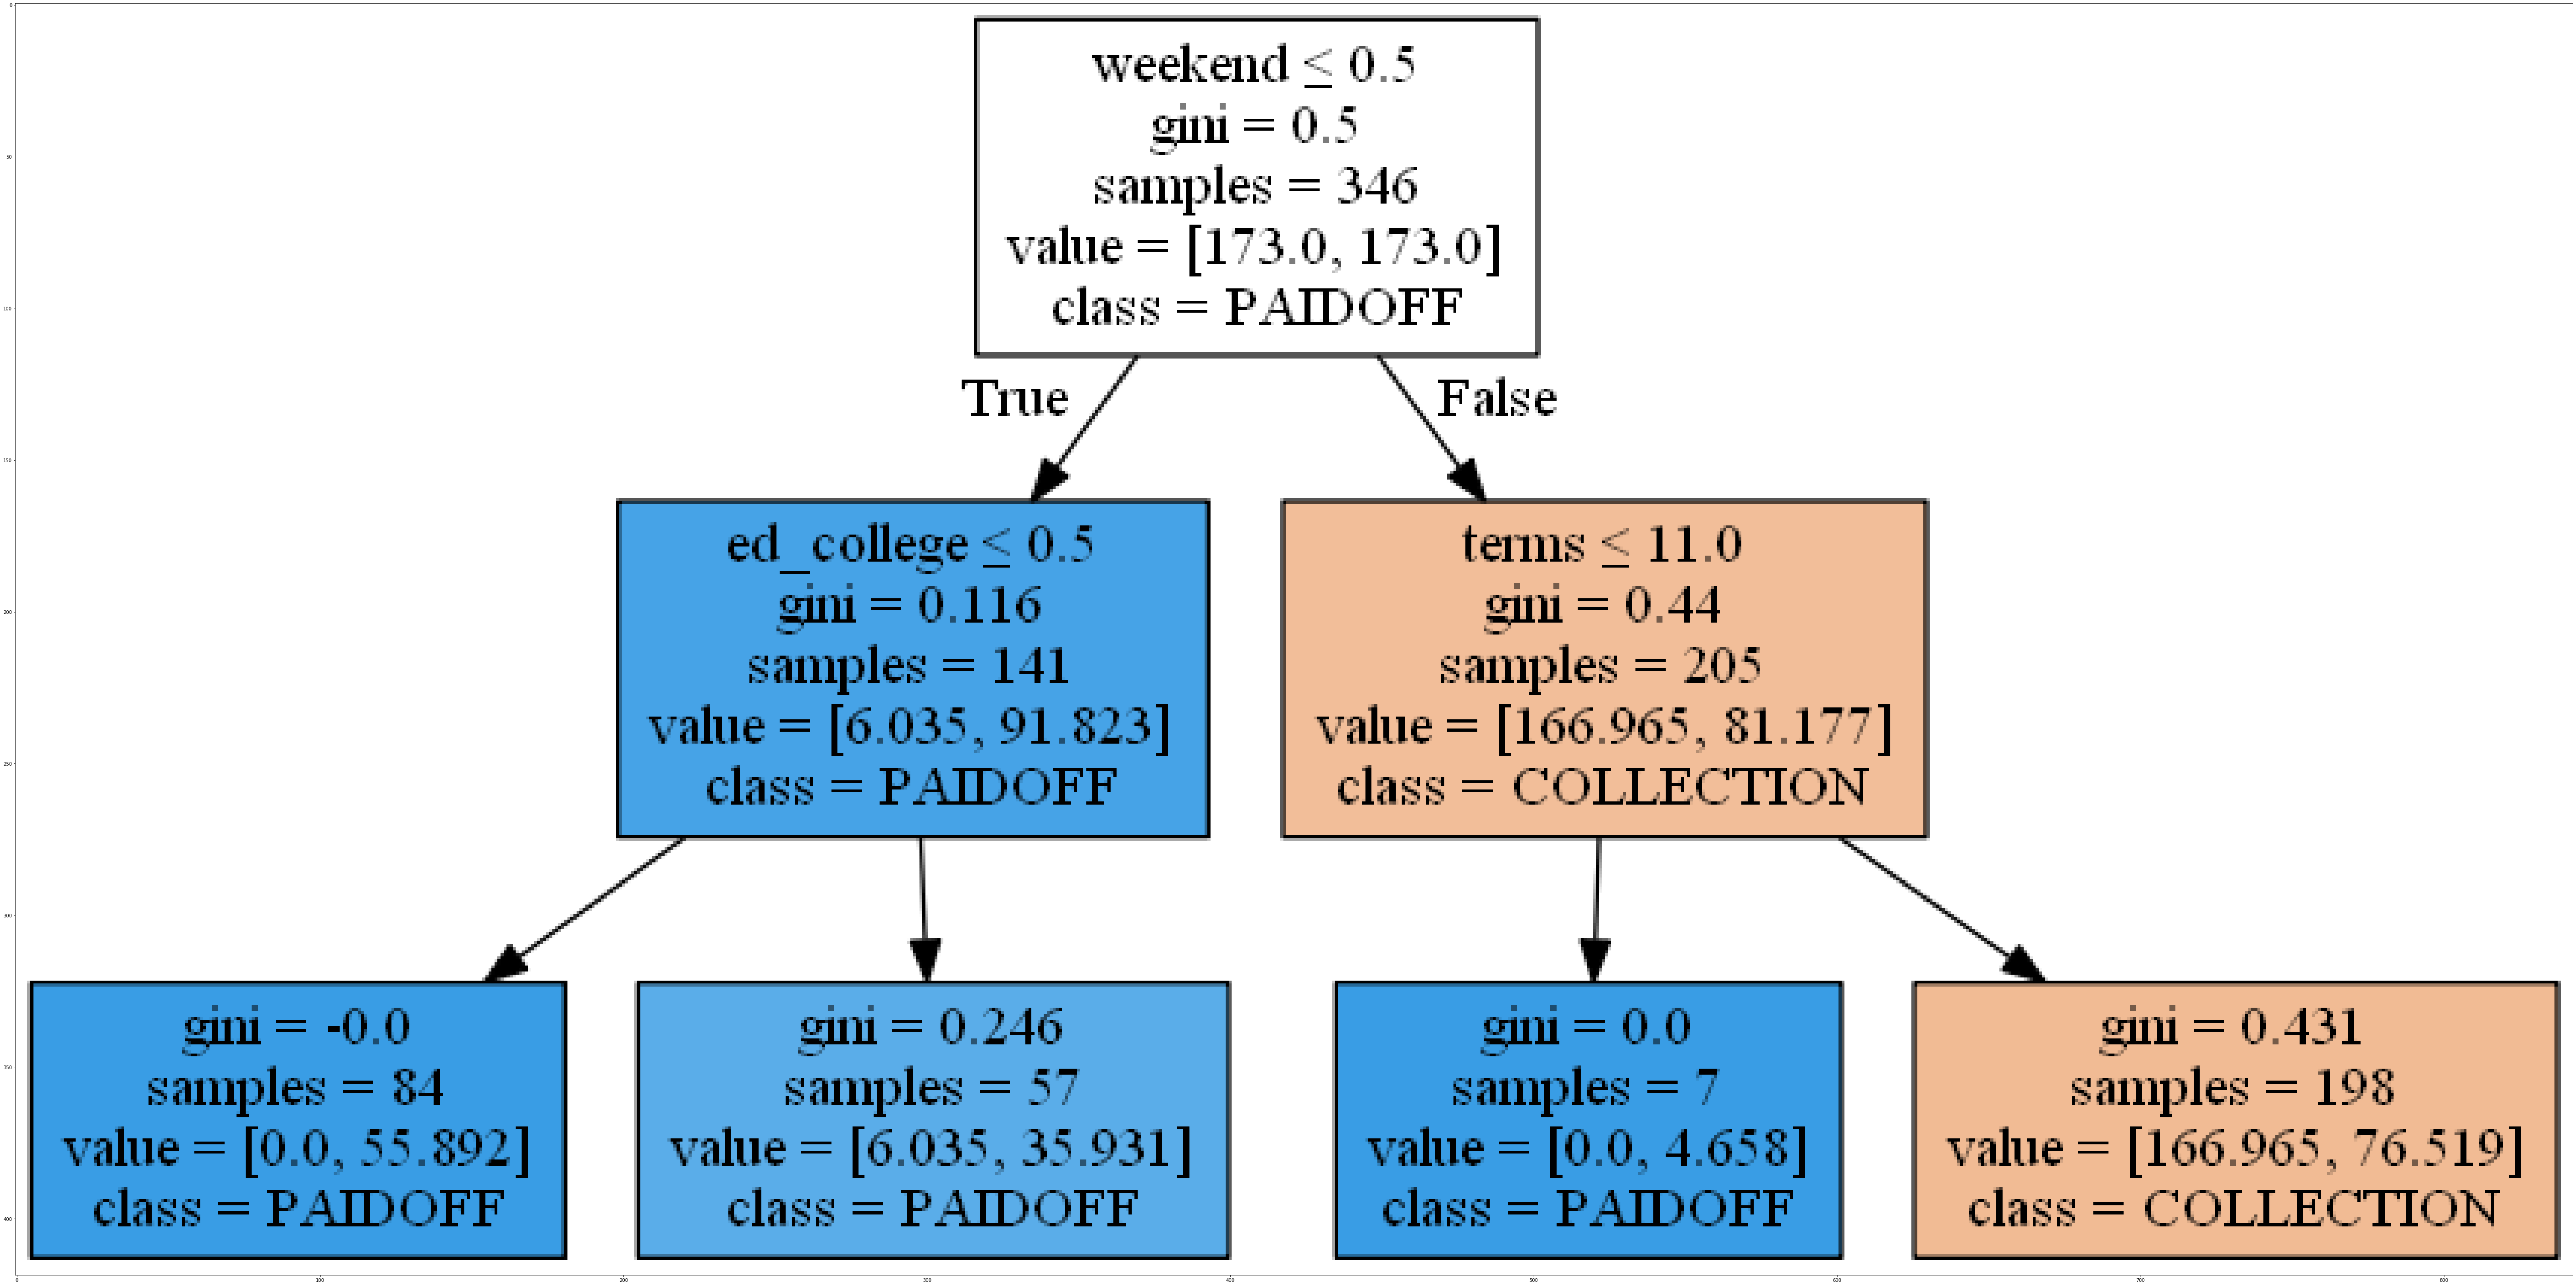

In [180]:
from io import StringIO
import matplotlib.image as mpimg
%matplotlib inline
from sklearn import tree
import graphviz
import pydotplus

dot_data = StringIO()
filename = "tree_R1_Xall.png"
featureNames = X_all.columns
# targetNames = df["loan_status"][.unique().tolist()]
#targetName=['PAIDOFF','COLLECTION']
targetName=['COLLECTION','PAIDOFF']
pipe_dtc_opt.steps[0][1].fit(X_train,y_train)
out=tree.export_graphviz(pipe_dtc_opt.steps[0][1], feature_names=featureNames, out_file=dot_data, class_names=targetName, filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Optimization: Decision Tree

### Parameters for Round 1

    estimator = Pipeline([('model',DecisionTreeClassifier())])
    param = {'model__criterion':['gini','entropy'],
             'model__max_depth':[x for x in range(1,11)],
             'model__class_weight':['balanced',None],
             'model__min_samples_split':[x for x in range(2,11,2)],
             'model__min_samples_leaf':[x for x in range(1,6)]
            }
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)

#### Results for Round 1

Feature Set \ Evaluator | Wall Time | Best Custom | Best Precision | Best Parameters
---|---|---|---|---
X_orig | 4min 16s | 0.1196 | 0.9801 | {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
X_new | 4min 16s | 0.1196 | 0.9801 | {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
X_all | 3min 26s | 0.1196 | 0.9801 | {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}

###### X_orig

    Best Custom    score 0.1196 +/- 0.0236 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Precision score 0.9801 +/- 0.0365 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Recall    score 1.0000 +/- 0.0000 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Accuracy  score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Balanced  score 0.7622 +/- 0.0487 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best F1        score 0.8566 +/- 0.0402 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Jaccard   score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best ROC       score 0.7648 +/- 0.0482 found at {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Wall time: 4min 16s

###### X_new

    Best Custom    score 0.1196 +/- 0.0236 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Precision score 0.9801 +/- 0.0365 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Recall    score 1.0000 +/- 0.0000 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Accuracy  score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Balanced  score 0.7622 +/- 0.0487 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best F1        score 0.8566 +/- 0.0402 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Jaccard   score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best ROC       score 0.7622 +/- 0.0491 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Wall time: 4min 16s

###### X_all
    Best Custom    score 0.1196 +/- 0.0236 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Precision score 0.9801 +/- 0.0365 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Recall    score 1.0000 +/- 0.0000 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Accuracy  score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Balanced  score 0.7622 +/- 0.0487 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best F1        score 0.8566 +/- 0.0402 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best Jaccard   score 0.7514 +/- 0.0619 found at {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Best ROC       score 0.7631 +/- 0.0489 found at {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
    Wall time: 4min 27s

### Conclusions

Curiously, a low tree depth is sufficient to achieve a good score (as Custom and Precision scores are driven by the number of true positives, the algorithm elects to allow many false negatives, which can be accomplished early).

Even more curiously, this approach produces better results than the K Nearest Neighbor classirier.

Again we will select to use the Custom score optimization for X_all (though the model is the same for all X input options:

    {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}

# Support Vector Machine

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [66]:
%%time

# Model name, e.g. for display of results
model_name = 'Support Vector Machine'

# Define the processing pipeline
pipe_input = [('scale',StandardScaler()),('model',SVC())]

# Define scoring specific to this model
scoring = SCORING.copy()
scoring.pop('-LogLoss',None)

# Parameters for fitting grid.  With Pipeline you must prefix a parameter with the pipe item name and two underscores
param = [
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         'model__kernel':['linear']
        }]#,
'''        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         #'model__coef0':[],
         #'model__gamma':[],
         'model__degree':[2,3,4,5,6],
         'model__kernel':['poly']
        },
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         #'model__coef0':[],
         #'model__gamma':[],
         'model__kernel':['sigmoid']
        },
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         #'model__gamma':[],
         'model__kernel':['rbf']
        }
        ]'''

# Instantiate search grid and perform the fit
pipe = Pipeline(pipe_input)
cv = ENV_CV(n_splits=ENV_NSPLITS, n_repeats=ENV_NREPEATS, random_state=ENV_RANDOMSTATE)
grid = GridSearchCV(pipe, param_grid=param, scoring=scoring, refit=REFIT, cv=cv, return_train_score=True, error_score=np.NaN, n_jobs=ENV_NJOBS)
grid.fit(X_train,y_train)

# Add an entry to RESULTS
RESULTS[model_name] = {'pipe_input':pipe_input,
                       'param':param,
                       'results':grid.cv_results_,
                       'scoring':scoring,
                       'best_indices':{metric:np.argmin(np.array(grid.cv_results_[f'rank_test_{metric}'])) for metric in scoring.keys()}
                      }

# Print the best scores and parameters for all scoring methods selected
print_scores(scoring, grid.cv_results_)

Best Max Profit score 0.1136 +/- 0.0177 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
Best Precision  score 0.9786 +/- 0.0246 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
Best Recall     score 1.0000 +/- 0.0000 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
Best Accuracy   score 0.7515 +/- 0.0431 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
Best Balanced   score 0.7475 +/- 0.0366 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
Best F1         score 0.8574 +/- 0.0281 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
Best Jaccard    score 0.7515 +/- 0.0431 found at {'model__C': 0.0001, 'model__

In [67]:
# Save the results of the fit for later use
grid_svm = grid
grid_svm_results = grid.cv_results_
pipe_svm_opt = grid.best_estimator_

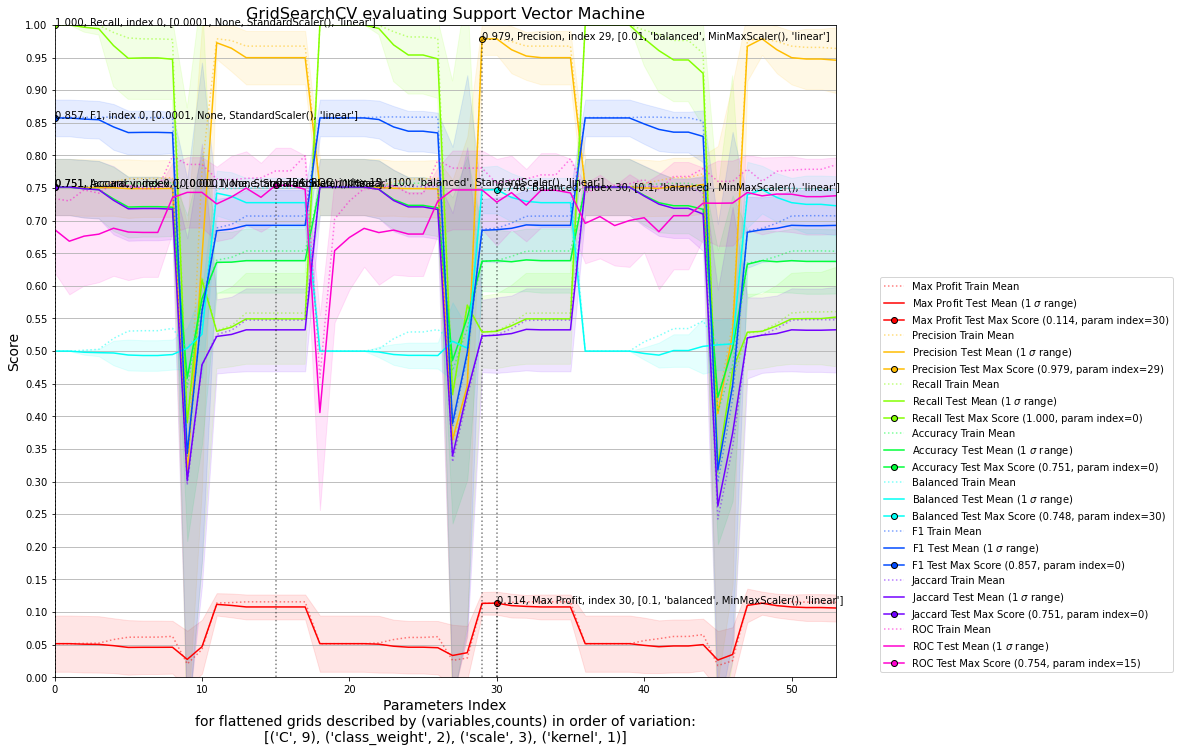

In [70]:
# Plot the results
display_GridSearchCV_results(grid_svm_results, param, scoring, modeltype='Support Vector Machine',reorder=[[2,1,0,3]])#,[2,3,1,0,4],[2,1,0,3],[2,1,0,3]])

## Optimization: Support Vector Machine

### Parameters for Round 1

    estimator = Pipeline([('scale',StandardScaler()),('model',SVC())])
    param = [
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             'model__kernel':['linear']
            },
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             #'model__coef0':[],
             #'model__gamma':[],
             'model__degree':[2,3,4,5,6],
             'model__kernel':['poly']
            },
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             #'model__coef0':[],
             #'model__gamma':[],
             'model__kernel':['sigmoid']
            },
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             #'model__gamma':[],
             'model__kernel':['rbf']
            }
            ]
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)

#### Results for Round 1

Feature Set \ Evaluator | Wall Time | Best Custom | Best Precision | Best Parameters
---|---|---|---|---
X_all | ? | 0.1142 | 0.9788 | {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()}

###### X_orig

Not run.

###### X_new

Not run.

###### X_all

    Best Custom    score 0.1142 +/- 0.0250 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()}
    Best Precision score 0.9788 +/- 0.0390 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
    Best Recall    score 1.0000 +/- 0.0000 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best Accuracy  score 0.7514 +/- 0.0687 found at {'model__C': 0.1, 'model__class_weight': None, 'model__degree': 6, 'model__kernel': 'poly', 'scale': StandardScaler()}
    Best Balanced  score 0.7493 +/- 0.0519 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()}
    Best F1        score 0.8566 +/- 0.0402 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best Jaccard   score 0.7514 +/- 0.0619 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best ROC       score 0.7603 +/- 0.0753 found at {'model__C': 1, 'model__class_weight': 'balanced', 'model__kernel': 'rbf', 'scale': MinMaxScaler()}

#### Attempt 1 at a faster calculation

###### Parameters

    pipe_input = [('scale',StandardScaler()),('model',SVC())]
    param = [
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             'model__kernel':['linear']
            }]
    ENV_CV = RepeatedKFold # RepeatedStratifiedKFold
    ENV_NSPLITS = 5
    ENV_NREPEATS = 10
    ENV_RANDOMSTATE = 0
    Also using values for X_all and y, so it should be faster...
        
###### Results

    Best Max Profit score 0.1136 +/- 0.0177 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
    Best Precision  score 0.9786 +/- 0.0246 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
    Best Recall     score 1.0000 +/- 0.0000 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best Accuracy   score 0.7515 +/- 0.0431 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best Balanced   score 0.7475 +/- 0.0366 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': MinMaxScaler()}
    Best F1         score 0.8574 +/- 0.0281 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best Jaccard    score 0.7515 +/- 0.0431 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()}
    Best ROC        score 0.7542 +/- 0.0574 found at {'model__C': 100, 'model__class_weight': 'balanced', 'model__kernel': 'linear', 'scale': StandardScaler()}
    Wall time: 1h 17min 13s

### Conclusions

Several parameter sets look satisfactory.  While in the future we will want to extract a winner while also considering robustness (where variation in model hyperparameters still result in a good fit), in lieu of that analysis we will just take the parameters of the best Custom score of X_all:

    {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()}

# Logistic Regression

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [146]:
%%time

# Model name, e.g. for display of results
model_name = 'Logistic Regression'

# Define the processing pipeline
pipe_input = [('scale',StandardScaler()),('model',LogisticRegression())]

# Define scoring specific to this model
scoring = SCORING.copy()

# Parameters for fitting grid.  With Pipeline you must prefix a parameter with the pipe item name and two underscores
param = [
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         #'model__intercept_scaling':[0.1,0.2,0.3,0.5,0.75,1,1.25,1.5,2,3,5,10],
         'model__penalty':['l1','l2'],
         'model__solver':['liblinear']
        },
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         'model__l1_ratio':[0,0.2,0.4,0.6,0.8,1],
         'model__penalty':['elasticnet'], # Ranges from l1 to l2 based on l1_ratio
         'model__solver':['saga']
        },
        {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
         'model__class_weight':[None,'balanced'],
         'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
         'model__penalty':['l2'],
         'model__solver':['newton-cg','sag','lbfgs']
        }
        ]

# Instantiate search grid and perform the fit
pipe = Pipeline(pipe_input)
cv = ENV_CV(n_splits=ENV_NSPLITS, n_repeats=ENV_NREPEATS, random_state=ENV_RANDOMSTATE)
grid = GridSearchCV(pipe, param_grid=param, scoring=scoring, refit=REFIT, cv=cv, return_train_score=True, error_score=np.NaN, n_jobs=ENV_NJOBS)
grid.fit(X_train,y_train)

# Add an entry to RESULTS
RESULTS[model_name] = {'pipe_input':pipe_input,
                       'param':param,
                       'results':grid.cv_results_,
                       'scoring':scoring,
                       'best_indices':{metric:np.argmin(np.array(grid.cv_results_[f'rank_test_{metric}'])) for metric in scoring.keys()}
                      }

# Print the best scores and parameters for all scoring methods selected
print_scores(scoring, grid.cv_results_)

Best Max Profit score 0.1139 +/- 0.0188 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
Best Precision  score 0.9786 +/- 0.0246 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
Best Recall     score 1.0000 +/- 0.0000 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
Best Accuracy   score 0.7521 +/- 0.0439 found at {'model__C': 0.1, 'model__class_weight': None, 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': RobustScaler()}
Best Balanced   score 0.7481 +/- 0.0389 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
Best F1         score 0.857

In [73]:
# Save the results of the fit for later use
grid_lrc = grid
grid_lrc_results = grid.cv_results_
pipe_lrc_opt = grid.best_estimator_

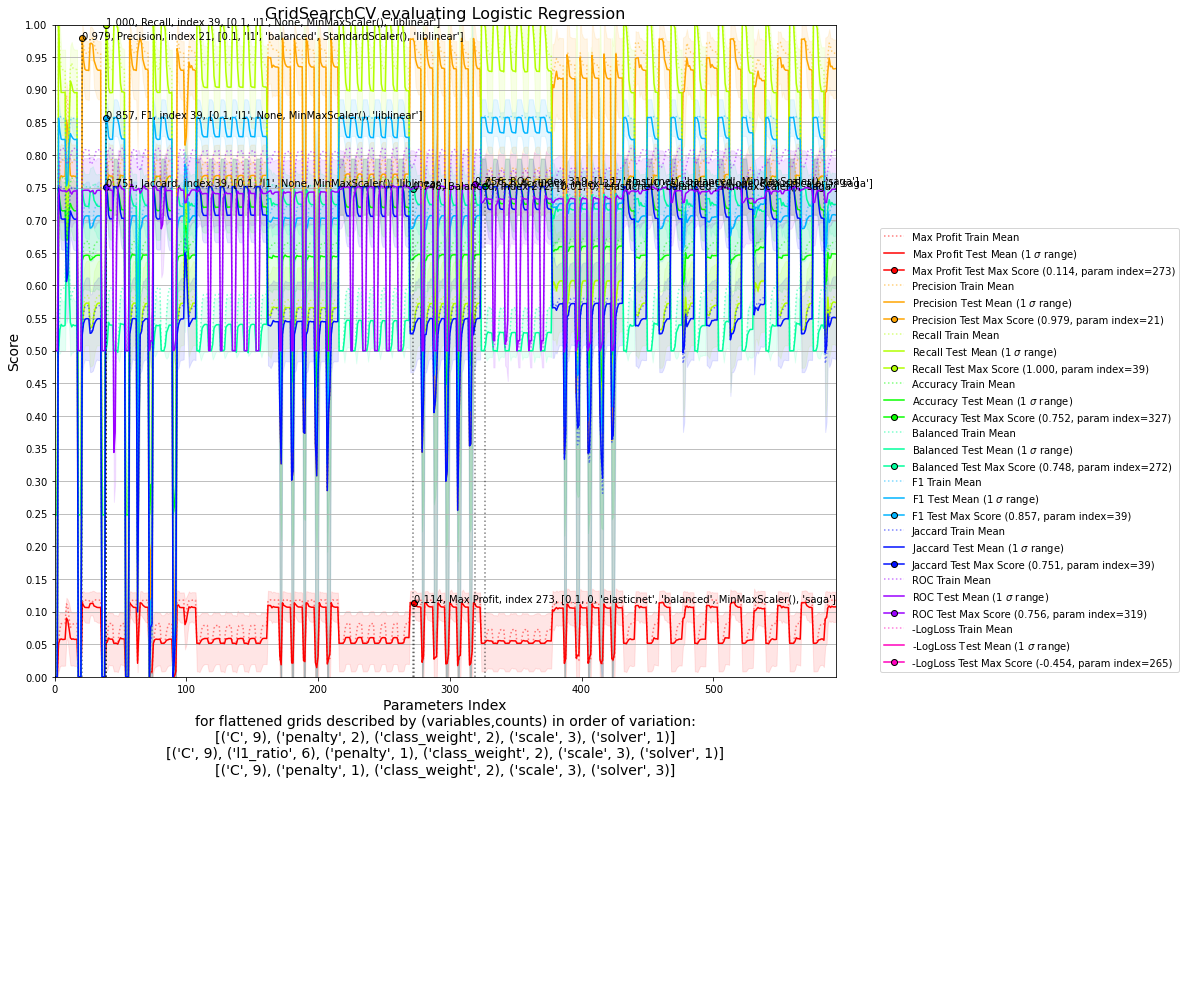

In [74]:
# Plot the results
display_GridSearchCV_results(grid_lrc_results, param, scoring, modeltype='Logistic Regression',reorder=[[2,3,1,0,4],[2,3,4,1,0,5],[2,3,1,0,4]])

## Optimization: Logistical Regression

### Parameters for Round 1

    estimator = Pipeline([('scale',StandardScaler()),('model',LogisticRegression())])
    param = [
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             #'model__intercept_scaling':[0.1,0.2,0.3,0.5,0.75,1,1.25,1.5,2,3,5,10],
             'model__penalty':['l1','l2'],
             'model__solver':['liblinear']
            },
            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             'model__l1_ratio':[0,0.2,0.4,0.6,0.8,1],
             'model__penalty':['elasticnet'],
             'model__solver':['saga']
            },

            {'scale':[StandardScaler(), MinMaxScaler(), RobustScaler()],
             'model__class_weight':[None,'balanced'],
             'model__C':[0.0001,0.001,0.01,0.1,1,10,100,100,10000],
             'model__penalty':['l2'],
             'model__solver':['newton-cg','sag','lbfgs']
            }
            ]
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)

#### Results for Round 1

Feature Set \ Evaluator | Wall Time | Best Custom | Best Precision | Best Parameters
---|---|---|---|---
X_all | 4min 42s | 0.1145 | 0.9789 | {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}

###### X_orig

Not run.

###### X_new

Not run.

###### X_all

    Best Custom    score 0.1145 +/- 0.0256 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
    Best Precision score 0.9789 +/- 0.0389 found at {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
    Best Recall    score 1.0000 +/- 0.0000 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
    Best Accuracy  score 0.7514 +/- 0.0619 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
    Best Balanced  score 0.7509 +/- 0.0537 found at {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
    Best F1        score 0.8566 +/- 0.0402 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
    Best Jaccard   score 0.7514 +/- 0.0619 found at {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
    Best ROC       score 0.7604 +/- 0.0812 found at {'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scale': MinMaxScaler()}
    Best -LogLoss  score -0.4554 +/- 0.0755 found at {'model__C': 1, 'model__class_weight': None, 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
    Wall time: 4min 42s

### Conclusions

Several parameter sets look satisfactory.  While in the future we will want to extract a winner while also considering robustness, in lieu of that analysis we will just take the parameters of the best Custom score of X_all:

    {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()}

# Model Evaluation using Test Set

First, download and load the test set (convert to code and run if necessary):

!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [172]:
df_test = pd.read_csv('loan_test.csv')
print(df_test.shape)
df_test.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Process the test dataset as we have processed the train dataset above.

In [173]:
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])

df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df_test['start'] = pd.DataFrame([x.toordinal() for x in df_test['effective_date']])
df_test['end'] = pd.DataFrame([x.toordinal() for x in df_test['due_date']])
df_test['duration'] = df_test['end']-df_test['start']+1
df_test['termcount'] = [int(round(x/y)) for x,y in zip(df_test['duration'],df_test['terms'])]
df_test.drop(labels=['start','end','duration'],axis=1,inplace=True)

df_test['termamount'] = df_test['Principal']/df_test['termcount']

# Use previous definition of gender_dict = {0:'male', 1:'female'}
tx_dict = gender_dict
df_test['ind_gender'] = df_test['Gender'].replace(to_replace=list(tx_dict.values()), value=(tx_dict.keys()), inplace=False)

df_test = pd.concat([df_test, pd.get_dummies(df_test['education'])], axis=1)

# Use previous definition of education_dict = {0:'High School or Below', 1:'college', 2:'Bechalor', 3:'Master or Above'}
tx_dict = education_dict
df_test['ind_education'] = df_test['education'].replace(to_replace=tx_dict.values(), value=tx_dict.keys(), inplace=False)

X_all_test = df_test.copy(deep=True)
X_all_test.drop(['Unnamed: 0','Unnamed: 0.1','loan_status','effective_date','due_date','education','Gender'], axis=1, inplace=True)
X_all_test.rename(columns={'Principal':'principal','ind_gender':'gender','Bechalor':'ed_bachelor','High School or Below':'ed_highschoolandbelow','college':'ed_college','Master or Above':'ed_masterandabove','ind_education':'education'},inplace=True)

X_orig_test = X_all_test.copy(deep=True)
X_orig_test.drop(['termcount','termamount','ed_masterandabove','education'], axis=1, inplace=True)

X_new_test = X_all_test.copy(deep=True)
X_new_test.drop(['ed_bachelor','ed_highschoolandbelow','ed_masterandabove','ed_college'], axis=1, inplace=True)

y_str_test = df_test[['loan_status']].copy(deep=True)

# Use previous definition of y_dict = {1:'PAIDOFF', 0:'COLLECTION'}
tx_dict = y_dict
y_ind_test = y_str_test[['loan_status']].replace(to_replace=list(tx_dict.values()), value=(tx_dict.keys()), inplace=False)

y_str_s_test = y_str_test['loan_status']
y_ind_s_test = y_ind_test['loan_status']

X_test = X_all_test.values
y_test = y_ind_s_test.values
print(y_test[0:5])
X_all_test.head()

[1 1 1 1 1]


,principal,terms,age,dayofweek,weekend,termcount,termamount,gender,ed_bachelor,ed_highschoolandbelow,ed_masterandabove,ed_college,education
0,1000,30,50,3,0,1,1000.0,1,1,0,0,0,2
1,300,7,35,4,1,1,300.0,0,0,0,1,0,3
2,1000,30,43,5,1,1,1000.0,1,0,1,0,0,0
3,1000,30,26,5,1,1,1000.0,0,0,0,0,1,1
4,800,15,29,6,1,1,800.0,0,1,0,0,0,2


### Evaluate the requested metrics (extendable to other metrics)

In [90]:
def getScoreDF(results,opt_score):
    '''Gets a dataframe of all metrics for each model in results when optimized for opt_score
    
    Parameters
    ----------
    results: dict of dicts, as per RESULTS
    opt_score: string, a key in SCORING denoting for which metric the model should be optimized
    
    Returns
    -------
    DataFrame, with rows for each model and columns for each scoring method and non-evaluated entries as np.NaN
    
    Notes
    -----
    Fit Results Summary data structure
     Dict:
      key:'name', the display name of the model (lets models be easily overwritten or new modeld incorporated)
      value:{
      'pipe_input': string for constructing a new pipeline
      'param': parameters for the pipeline
      'results': GridSearchCV.cv_results_
      'scoring': optionally reduced SCORING used to generate the GridSearchCV.cv_results_, may need to eliminate some entries from SCORING e.g. proba methods.  To get the base scoring function use scorefun = sklearn.metrics.get_scorer(str)._score_func
      'best_indices': dict with same keys as scoring and values of the index of parameters results['params'] which are optimal for the key scoring function
    '''
    # Get the list of all scoring methods
    scoring = set()
    for modeldict in results.values():
        scoring.update(list(modeldict['scoring'].keys()))
    scoring = list(scoring)
    
    # Create the empty pandas.DataFrame to populate
    df = pd.DataFrame(index=list(results.keys()),columns=scoring).astype('float')
    
    # Populate the dataframe
    for modelname, modeldict in results.items():
        if opt_score in modeldict['best_indices'].keys():
            opt_index = modeldict['best_indices'][opt_score]
            for scorename in modeldict['scoring']:
                df.loc[modelname,scorename] = modeldict['results'][f'mean_test_{scorename}'][opt_index]
    
    # Return the results
    return df

We can examine which models performed best under training:

In [174]:
scoring = ['F1','Jaccard','-LogLoss','Max Profit']
for score in scoring:
    print(f'Cross-validation training scores when models are optimized for {score}:')
    display(getScoreDF(RESULTS,score)[scoring].style.highlight_max().format("{:<0.4f}",na_rep='NA').set_table_styles([dict(selector="td", props=[("text-align", "left")]),dict(selector="th", props=[("text-align", "left")])]))
    print()

Cross-validation training scores when models are optimized for F1:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8318,0.7131,NA,0.0733
Decision Tree,0.8574,0.7515,NA,0.0515
Support Vector Machine,0.8574,0.7515,NA,0.0515
Logistic Regression,0.8574,0.7515,-0.6869,0.0515



Cross-validation training scores when models are optimized for Jaccard:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8318,0.7131,NA,0.0733
Decision Tree,0.8574,0.7515,NA,0.0515
Support Vector Machine,0.8574,0.7515,NA,0.0515
Logistic Regression,0.8574,0.7515,-0.6869,0.0515



Cross-validation training scores when models are optimized for -LogLoss:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,NA,NA,NA,NA
Decision Tree,NA,NA,NA,NA
Support Vector Machine,NA,NA,NA,NA
Logistic Regression,0.8520,0.7431,-0.4536,0.0523



Cross-validation training scores when models are optimized for Max Profit:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8044,0.6747,NA,0.0917
Decision Tree,0.7090,0.5511,NA,0.1196
Support Vector Machine,0.6861,0.5244,NA,0.1136
Logistic Regression,0.6921,0.5316,-0.5625,0.1139


In [154]:
def getTestScoreDF(results,opt_score,X_train,y_train,X_test,y_test):
    '''Gets a dataframe of all metrics for each model in results when optimized for opt_score
    
    Parameters
    ----------
    results: dict of dicts, as per RESULTS
    opt_score: string, a key in SCORING denoting for which metric the model should be optimized
    X_train: np.ndarray of features for training set
    y_train: np.array of targets for training set
    X_test: np.ndarray of features for test (evaluation) set
    y_test: np.array of targets for test (evaluation) set
    
    Returns
    -------
    DataFrame, with rows for each model and columns for each scoring method and non-evaluated entries as np.NaN
    
    Notes
    -----
    Fit Results Summary data structure
     Dict:
      key:'name', the display name of the model (lets models be easily overwritten or new modeld incorporated)
      value:{
      'pipe_input': string for constructing a new pipeline
      'param': parameters for the pipeline
      'results': GridSearchCV.cv_results_
      'scoring': optionally reduced SCORING used to generate the GridSearchCV.cv_results_, may need to eliminate some entries from SCORING e.g. proba methods.  To get the base scoring function use scorefun = sklearn.metrics.get_scorer(str)._score_func
      'best_indices': dict with same keys as scoring and values of the index of parameters results['params'] which are optimal for the key scoring function
    '''
    import sklearn.metrics
    import copy
    
    # Get the list of all scoring methods
    scoring = set()
    for modeldict in results.values():
        scoring.update(list(modeldict['scoring'].keys()))
    scoring = list(scoring)
    
    # Create the empty pandas.DataFrame to populate
    df = pd.DataFrame(index=list(results.keys()),columns=scoring).astype('float')
    
    # Populate the dataframe
    for modelname, modeldict in results.items():
        if opt_score in modeldict['best_indices'].keys():
            opt_index = modeldict['best_indices'][opt_score]
            for scorename, scorer in modeldict['scoring'].items(): # scorer should not be a string (convert using sklearn.metrics.get_scorer())
                # Create, set parameters, and fit the model
                model = Pipeline(copy.deepcopy(modeldict['pipe_input'])) # must have a pipe_input that has never had parameters set!
                model.set_params(**modeldict['results']['params'][opt_index])
                model.fit(X_train,y_train)
                y_testhat = model.predict(X_test)
                if hasattr(model,'predict_proba'):
                    y_testhata = model.predict_proba(X_test)
                # The above code snippet up to the for statment would make sense above the for statement, but we want a clean model for each parameter set
                #  e.g there were issues with a logistic model being set to linear kernel when a parameter only valide for 
                #      elasticnet kernel was remembered from evaluation of the previous scoring function
                evalfunc = scorer._score_func
                if type(scorer)==sklearn.metrics._scorer._PredictScorer:
                    df.loc[modelname,scorename] = evalfunc(y_test,y_testhat)
                elif type(scorer)==sklearn.metrics._scorer._ProbaScorer:
                    df.loc[modelname,scorename] = evalfunc(y_test,y_testhata)
                if scorer._sign==-1:
                    df.loc[modelname,scorename] = -df.loc[modelname,scorename]
    
    # Return the results
    return df

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

We examine first the training performance of our models when optimized according to various metrics:

In [177]:
scoring = ['F1','Jaccard','-LogLoss','Max Profit']
for score in scoring:
    print(f'Cross-validation test scores on training set when models are optimized for {score}:')
    display(getScoreDF(RESULTS,score)[scoring].style.highlight_max().format("{:<0.4f}",na_rep='NA').set_table_styles([dict(selector="td", props=[("text-align", "left")]),dict(selector="th", props=[("text-align", "left")])]))
    print()

Cross-validation test scores on training set when models are optimized for F1:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8318,0.7131,NA,0.0733
Decision Tree,0.8574,0.7515,NA,0.0515
Support Vector Machine,0.8574,0.7515,NA,0.0515
Logistic Regression,0.8574,0.7515,-0.6869,0.0515



Cross-validation test scores on training set when models are optimized for Jaccard:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8318,0.7131,NA,0.0733
Decision Tree,0.8574,0.7515,NA,0.0515
Support Vector Machine,0.8574,0.7515,NA,0.0515
Logistic Regression,0.8574,0.7515,-0.6869,0.0515



Cross-validation test scores on training set when models are optimized for -LogLoss:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,NA,NA,NA,NA
Decision Tree,NA,NA,NA,NA
Support Vector Machine,NA,NA,NA,NA
Logistic Regression,0.8520,0.7431,-0.4536,0.0523



Cross-validation test scores on training set when models are optimized for Max Profit:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8044,0.6747,NA,0.0917
Decision Tree,0.7090,0.5511,NA,0.1196
Support Vector Machine,0.6861,0.5244,NA,0.1136
Logistic Regression,0.6921,0.5316,-0.5625,0.1139


Max Profit optimization (see the Fit Metrics and Scoring Function sub-sections immediately under the Classification section heading) leads us to select a Decision Tree model (4th table, score 0.1196) as the most promising model from a business perspective.

F1 or Jaccard optimization leads to Max Profit scores less than half the score for Max Profit optimization (~0.05), except for the K Nearst Neighbor model with Max Profit score of ~0.07, which is still low.  The Max Profit score under F1 and Jaccard optimization prefers the K Nearest Neighbor model, so this is chosen as a runner-up to the Decision Tree.

It may be worth re-running the analysis with loan_status: PAIDOFF = 0, COLLECTION = 1 which would alter the sensitivity of the F1, Jaccard, and Accuracy metrics (alternatively, macro, micro, or weighted versions of those metrics could be used).

Let's see how the optimized models actually perform with the test set:

In [178]:
scoring = ['F1','Jaccard','-LogLoss','Max Profit']
for score in scoring:
    print(f'Scores on test set when models are optimized for {score}:')
    display(getTestScoreDF(RESULTS,score,X_train,y_train,X_test,y_test)[scoring].style.highlight_max().format("{:<0.4f}",na_rep='NA').set_table_styles([dict(selector="td", props=[("text-align", "left")]),dict(selector="th", props=[("text-align", "left")])]))
    print()

Scores on test set when models are optimized for F1:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8293,0.7083,NA,0.0852
Decision Tree,0.8511,0.7407,NA,0.0407
Support Vector Machine,0.8511,0.7407,NA,0.0407
Logistic Regression,0.8511,0.7407,-0.6859,0.0407



Scores on test set when models are optimized for Jaccard:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.8293,0.7083,NA,0.0852
Decision Tree,0.8511,0.7407,NA,0.0407
Support Vector Machine,0.8511,0.7407,NA,0.0407
Logistic Regression,0.8511,0.7407,-0.6859,0.0407



Scores on test set when models are optimized for -LogLoss:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,NA,NA,NA,NA
Decision Tree,NA,NA,NA,NA
Support Vector Machine,NA,NA,NA,NA
Logistic Regression,0.8511,0.7407,-0.4837,0.0407



Scores on test set when models are optimized for Max Profit:


,F1,Jaccard,-LogLoss,Max Profit
K Nearest Neighbor,0.7532,0.6042,NA,0.0574
Decision Tree,0.7385,0.5854,NA,0.1204
Support Vector Machine,0.6333,0.4634,NA,0.0926
Logistic Regression,0.6333,0.4634,-0.5855,0.0926


For Max Profit optimization, we see that the Decision Tree is still the best model, and K Nearest Neighbors has fallen far behind.

We are justified in our selection of the Decison Tree model.

Variability in the relative suitability of models is expected especially for small datasets (346 train, 54 test), and demonstrates the desirability of tracking the performance of and updating several models as new data is acquired.

The final decision tree is shown below for reference.  This model is simple, easily deployable and usable offline, and most importantly will lead to greatest profit under the business assumptions discussed above, namely:

1. Priority of profit
2. Collection recovery rate $R_c = 65\%$
3. Paid-off loan profit rate $R_p=15\%$

which can be readily updated, and this analysis re-run, in order to obtain updated results and model recommendations.

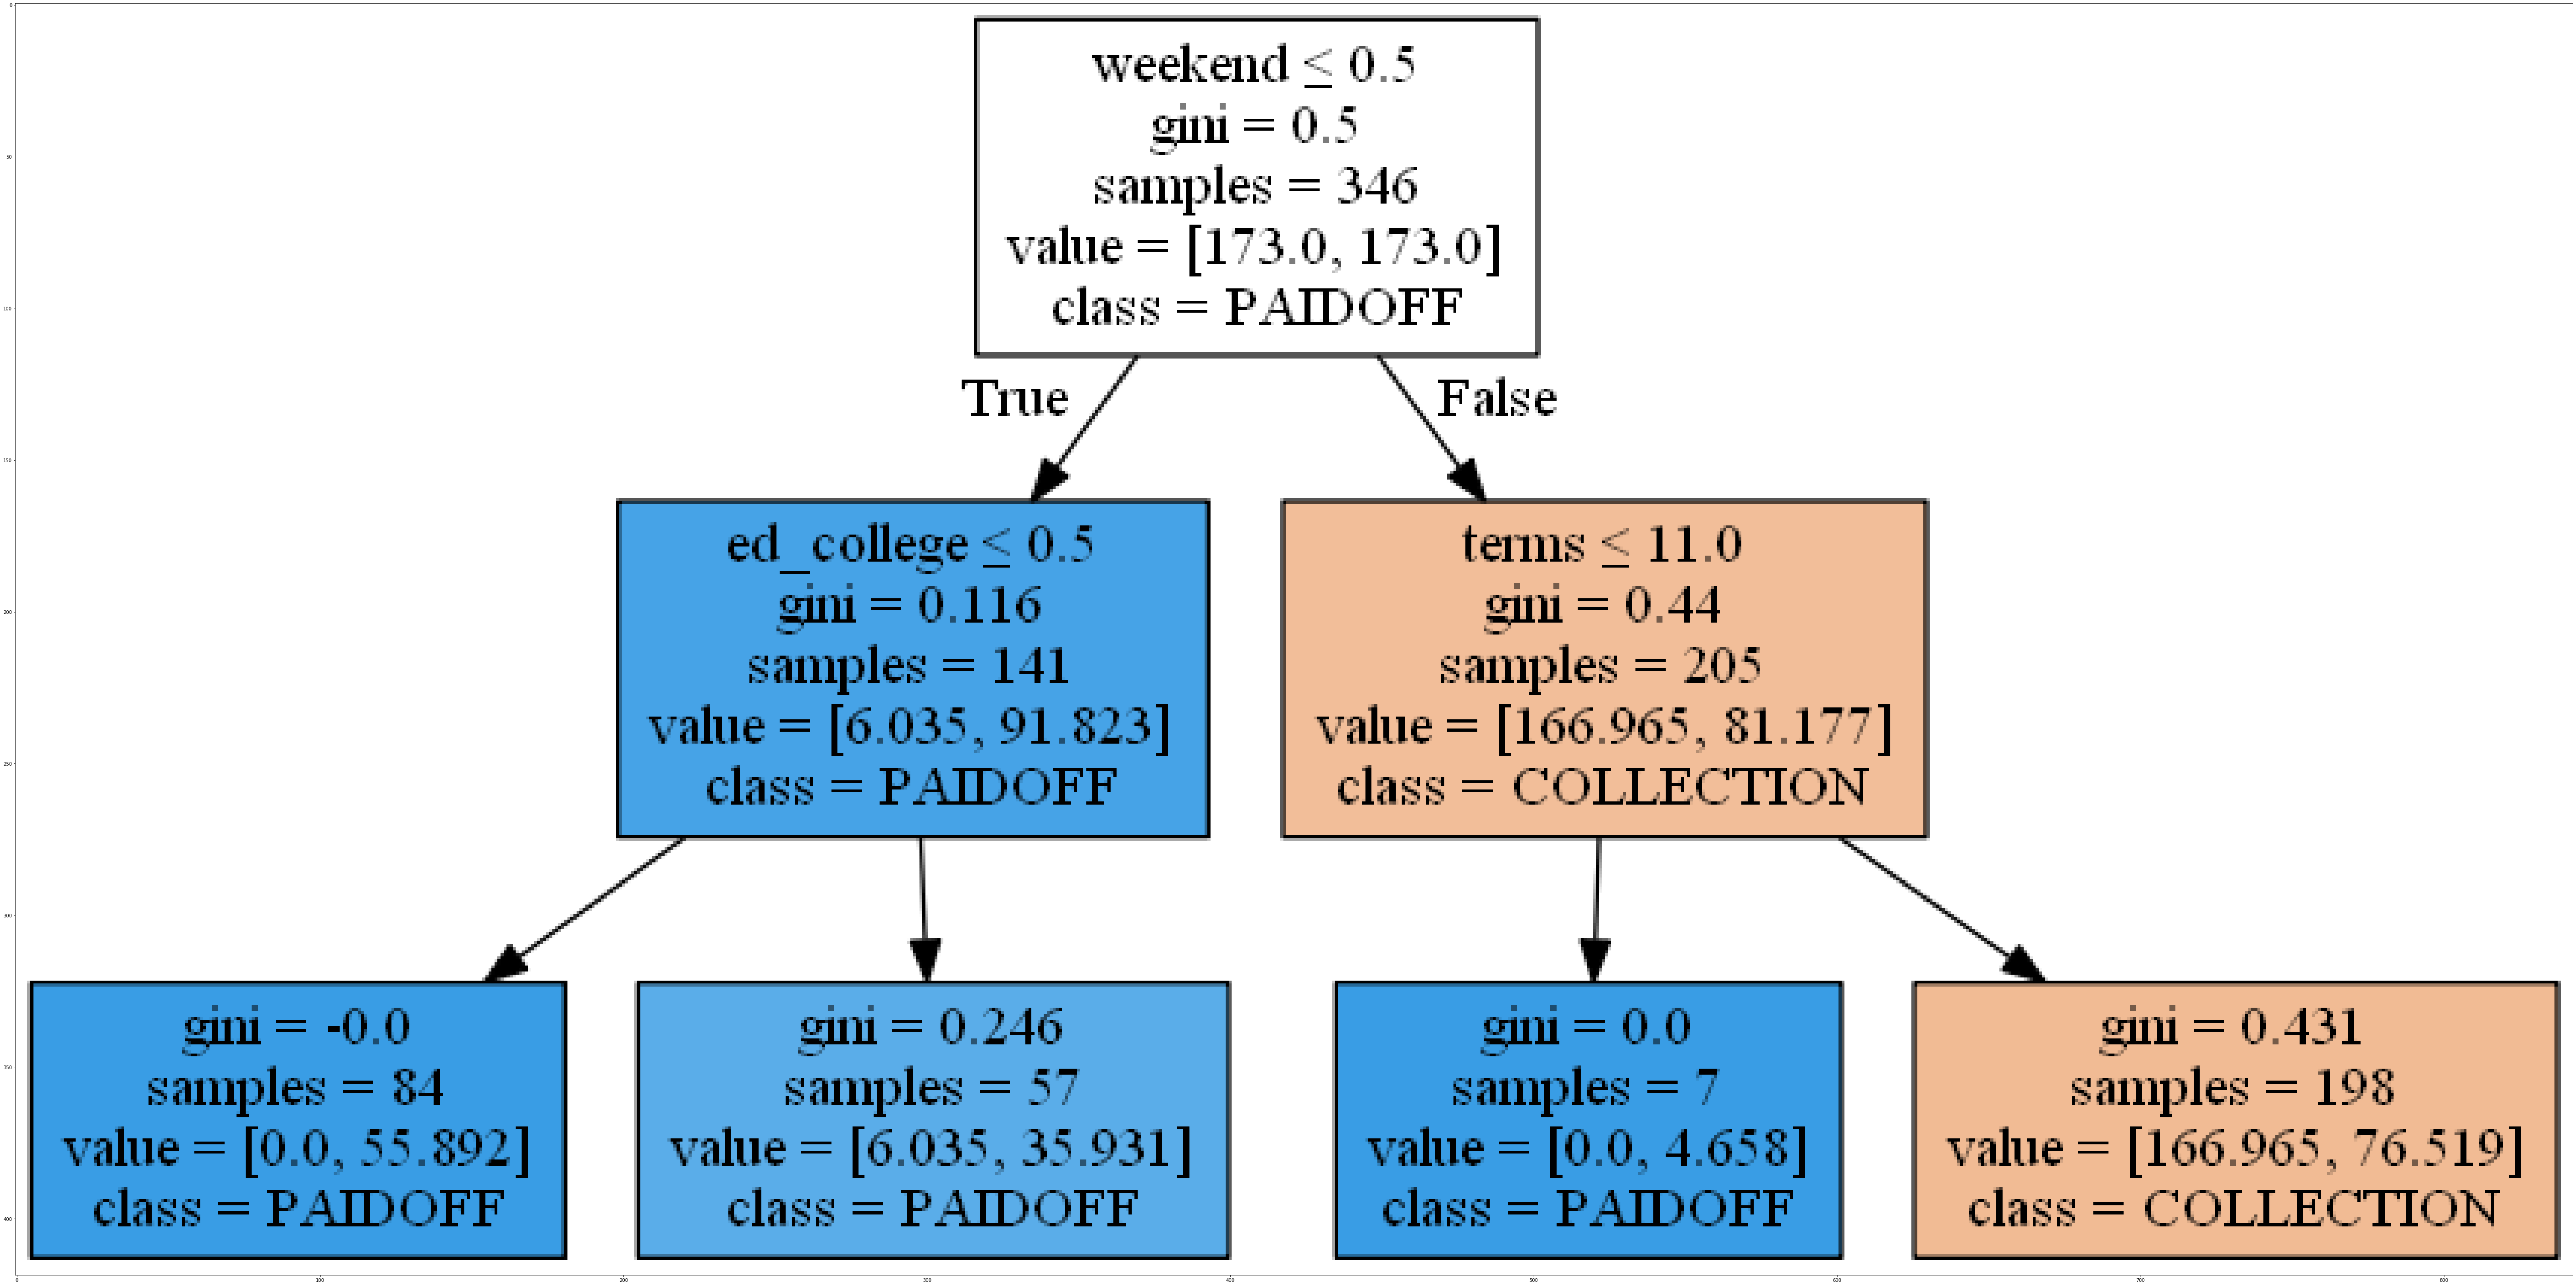

In [181]:
filename = "tree_R1_Xall.png"
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Session Export

Convert to code and run the following block to save the environment:

    dill.dump_session(filename)

(note that some objects cannot be pickled, like dict_keys and other generators, so make sure they are removed first)

(apparently Jupyterlab hooks prevent pickling, so we can choose to pickle just RESULTS to speed up reruns)

In [199]:
import dill
with open('loan_evaluation_results.db','wb') as file:
    dill.dump(RESULTS,file)

# Appendix

## Execution time on development laptop

    Timing investigation:
    n_jobs can really speed up execution, backend works out of the box in my Anaconda environment
    My laptop (i7-8750, 2.20 GHz, 20 GB RAM, Windows 10 64-bit) runs each python.exe at 6 threads and 8% average CPU utilization
    
    n_jobs, time, time with less background, notes
    0  5:12 3:49 up to 8.32% average CPU 14 threads
    1       3:47 up to 8.31% average CPU 14 threads
    2  2:52 2:06 up to 8.32% average CPU per process 6 then 3 threads each
    4  1:46 1:19 7 to 8.3% average CPU per process 4 then 6 then 3 threads each
    6  1:35 1:05 70-80% total CPU utilization, 120-130% CPU speed, 4 then 6 then 3 threads each process
    8  1:24 0:58 88-103% total CPU utilization, 115-120% CPU frequency, 4 then 6 then 3 threads each process
    
    Note: Number of threads may vary depending on settings.  Varying 4 parameters instead of 3, number of threads started at 1.
    I can safely run n_jobs=6 while leaving room for other processes to complete

## Useful snippets from plotting

    Alternative/useful snippets:
    ax.legend(loc='best')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    alpha=0.1 if sample == 'test' else 0
    for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
    _, plot_mean = zip(*sorted(zip(newind, results[f'mean_{plottype}_{metric}'])))
    plot_mean = np.array(plot_mean)

## Notes on GridSearchCV

Some other items that are useful to inspect:

    grid_knc.cv_results_
    grid_knc.best_estimator_
    grid_knc.best_score_
    grid_knc.scorer_
    dir(grid_knc)

An earlier version of fitting that does not examine multiple scores or use multiple iterations for averaging out noise in the fitting results

    ks = [x for x in range(1,20)]

    pipe_knc_input = [('scale',StandardScaler()), ('model',KNeighborsClassifier())]
    pipe_knc = Pipeline(pipe_knc_input)

    param_knc = {'model__n_neighbors':ks} # With Pipeline you must prefix a parameter with the pipe item name and two underscores

    grid_knc = GridSearchCV(pipe_knc, param_grid=param_knc, cv=10, return_train_score=True)
    grid_knc.fit(X,y)
    print(f"Best score {grid_knc.best_score_:0.4f} found at {grid_knc.best_params_}")

## Initial GridSearchCV Results Plotting

    xs = [x for x in range(len(grid_dtc_results['params']))] # index for parameter list display
    ls = [str(list(x.values())) for x in grid_dtc_results['params']] # string representation for parameter list display

    plt.figure(figsize=(40,12))
    plt.title("GridSearchCV evaluating Decision Tree",fontsize=16)
    plt.xlabel(f"Parameters\n[{[x.split('__',1)[1] for x in list(param.keys())]}]",fontsize=14)
    plt.ylabel("Score",fontsize=14)
    ax = plt.gca()

    colors = [cm.hsv(x/len(grid_dtc_results['params'])) for x in xs]
    linetype = ['--','-']
    scores = grid.cv_results_
    xs = [x for x in range(len(scores['params']))]
    for i, metric in enumerate(scoring.keys()):
        for k, plottype in enumerate(['train','test']):
            plot_mean = scores[f'mean_{plottype}_{metric}']
            plot_std = scores[f'std_{plottype}_{metric}']
            lblsuffix = " (1 $\sigma$ range)" if plottype=="test" else ""
            ax.plot(xs, plot_mean, linetype[k], color=colors[i], label=f'{metric} {plottype.capitalize()} Mean{lblsuffix}')
            ax.fill_between(xs, plot_mean - plot_std, plot_mean + plot_std, color=colors[i],alpha=0.1 if plottype=='test' else 0, label='')
            if plottype=='test':
                ind_opt = np.argmin(scores[f'rank_{plottype}_{metric}'])
                ax.plot(xs[ind_opt], plot_mean[ind_opt], label=f'{metric} {plottype.capitalize()} Max Score ({plot_mean[ind_opt]:.3f}, param index={xs[ind_opt]})', marker='o', color=colors[i], markeredgecolor='black')
                ax.plot((xs[ind_opt],)*2, (0, plot_mean[ind_opt]), ':', color='black', alpha=0.5, label='')
                ax.annotate(f'{plot_mean[ind_opt]:0.3f}, param index={xs[ind_opt]}', (xs[ind_opt],plot_mean[ind_opt]))
    ax.set_xticks(xs)
    ls = [str(list(x.values())) for x in scores['params']]
    ax.set_xticklabels(ls, rotation=90, fontsize=8)
    ax.set_ylim(0,1)
    ax.set_xlim(min(xs),max(xs))
    ax.legend(loc='best')

## Reordered GridSearchCV Results Plotting

    results = grid_knc_results
    xs = [x for x in range(len(results['params']))] # index for parameter list display
    ls = [str(list(x.values())) for x in results['params']] # string representation of parameter values for short parameter list display

    plt.figure(figsize=(14,12))
    plt.title("GridSearchCV evaluating K Nearest Neighbors",fontsize=16)
    ax = plt.gca()

    # Resort results to display parameters with desired order of variation given by reorder
    newind = np.array(xs)
    # TODO: Extend for the case that param is a list of dicts - maybe newind is a list of lists - is the format of entries in results changed?
    #  Note for alternative implementation: The parameters of GridSearchCV seem to be internally sorted alphabetically
    #  Resort so that trends that should be somewhat continuous (e.g. k) are the earliest iterator
    # Reorder the parameter list from the fit (param variable contains the grid elements we entered)
    reorder = [3,0,1,2] # indices of parameters in params in the order they should be iterated
    assert len(reorder)==len(param)

    # Update newind to reorder all elements of results so they reflect param adjusted by reorder
    paramkeys = list(param.keys()) # Dict ordering guaranteed to be insertion order as of Python 3.7 (Feb 2020)
    paramvalues = list(param.values())
    paramcounts = np.array([len(x) for x in paramvalues])
    i=0
    indices_to_lookup = [] # The list of indices as returned by GridSearchCV, where indices have been rearranged according to reorder
    for paramdict in results['params']:
        ind_tmp = [];
        for k in reorder:
            ind_tmp.append(paramdict[f'{paramkeys[k]}'])
        indices_to_lookup.append(ind_tmp)
    #    print(indices_to_lookup)
    #print(indices_to_lookup[0:15])
    #print()

    indices_to_match = [] # The desired indices in display order, as specified by reorder of param
    indices = [x for x in range(len(indices_to_lookup))] # [0:N]
    indices = np.unravel_index(indices, shape=paramcounts[reorder], order='F') # Tuple of index arrays, one for each dimension
    indices = [x for x in zip(*indices)] # List of tuples containing indices for each dimension, one tuple per inital flat index
    for index in indices:
        to_append = []
        for k, val in enumerate(index):
            to_append.append(paramvalues[reorder[k]][val])
        indices_to_match.append(to_append)
    #print(indices_to_match[0:15])
    for k in range(len(newind)):
        newind[k] = indices_to_lookup.index(indices_to_match[k])
    #print(newind[0:5])


    # Update the plotting arrays we will use:
    #  ind_opt, plot_mean, plot_std reindexed in plotting loop below
    ls = np.array(ls)[newind]

    colors = [cm.hsv(x/(len(scoring.keys()))) for x in range(len(scoring.keys()))]

    for i, metric, color in zip(range(len(scoring.keys())),
                                scoring.keys(),
                                colors):
        for k, (plottype, linetype, linealpha, fillalpha) in enumerate(zip(['train','test'],
                                                                           [':','-'],
                                                                           [0.5,1],
                                                                           [0,0.1])):
            # Use newind to get the reindexed variables of interest
            plot_mean = np.array(results[f'mean_{plottype}_{metric}'])[newind]
            plot_std = np.array(results[f'std_{plottype}_{metric}'])[newind]
            lblsuffix = " (1 $\sigma$ range)" if plottype=="test" else ""
            ax.plot(xs, plot_mean, linetype, color=color, alpha=linealpha, label=f'{metric} {plottype.capitalize()} Mean{lblsuffix}')
            ax.fill_between(xs, plot_mean - plot_std, plot_mean + plot_std, color=color,alpha=fillalpha, label='')
            if plottype=='test':
                newrank = np.array(results[f'rank_{plottype}_{metric}'])[newind]
                ind_opt = np.argmin(newrank)
                ax.plot(xs[ind_opt], plot_mean[ind_opt], label=f'{metric} {plottype.capitalize()} Max Score ({plot_mean[ind_opt]:.3f}, param index={xs[ind_opt]})', marker='o', color=colors[i], markeredgecolor='black')
                ax.plot((xs[ind_opt],)*2, (0, plot_mean[ind_opt]), ':', color='black', alpha=0.5, label='')
                ax.annotate(f'{plot_mean[ind_opt]:0.3f}, {metric}, index {xs[ind_opt]}, {ls[ind_opt]}', (xs[ind_opt],plot_mean[ind_opt]))

    plt.xlabel(f"Parameters Index\n{[x if x.find('__')==-1 else x.split('__',1)[1] for x in np.array(paramkeys)[reorder]]}",fontsize=14)
    plt.ylabel("Score",fontsize=14)            
    #ax.set_xticks(xs)
    #ax.set_xticklabels(ls, rotation=90, fontsize=8)
    ax.set_yticks(np.arange(0,1.05,0.05))
    ax.set_ylim(0,1)
    ax.set_xlim(min(xs),max(xs))
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left')
    ax.grid(True, axis='y')

### For searching and printing parameters:

    dir(pipe_dtc_opt.steps[1][1])
    pipe_dtc_opt.steps[1][1].criterion
    import sklearn.utils.validation as v
    print(v.isclass(grid.best_estimator_))
    print(hasattr(grid.best_estimator_, 'fit_'))
    print(grid_dtc_results['params'][770])For searching and printing parameters:

    dir(pipe_dtc_opt.steps[1][1])
    pipe_dtc_opt.steps[1][1].criterion
    import sklearn.utils.validation as v
    print(v.isclass(grid.best_estimator_))
    print(hasattr(grid.best_estimator_, 'fit_'))
    print(grid_dtc_results['params'][770])

### Generate a scores dataframe - Original version before RESULTS dict

    pipe_knc_opt = grid_knc.best_estimator_
    pipe_dtc_opt = grid_dtc.best_estimator_
    pipe_svm_opt = grid_svm.best_estimator_
    pipe_lrc_opt = grid_lrc.best_estimator_
    X_train = X_all
    y_train = y_ind_s.values # y_str, y_str_s and their .values do not work; y_ind gives error  A column-vector y was passed when a 1d array was expected, use e.g. ravel(); y_ind_s works, as does y_ind_s.values; However there's a FutureWarning that labels _will_ work in future versions (which are current... had I upgraded to one of those before??)
    print(X_train.shape)
    print(y_train.shape)
    estimators = {'KNN':pipe_knc_opt, 'Decision Tree':pipe_dtc_opt, 'SVM':pipe_svm_opt, 'Logistic Regression':pipe_lrc_opt}
    evaluators = {'Jaccard':jaccard_score,'F1-score':f1_score,'LogLoss':log_loss,'Max Profit':loan_scoring_function}
    columns = ['Algorithm','Jaccard','F1-score','LogLoss', 'Max Profit']
    addlist = {}
    for col in columns:
        addlist[col] = []
    for name, estimator in estimators.items():
        estimator.fit(X_train,y_train)
        y_testhat = estimator.predict(X_test)
        addlist['Algorithm'].append(name)
        for testname, score_func in evaluators.items():
            addlist[testname].append(score_func(y_test, y_testhat))
            if testname=='LogLoss':
                if name=='Logistic Regression':
                    addlist[testname][-1] = score_func(y_test, estimator.predict_proba(X_test))
                else:
                    addlist[testname][-1] = None
    df_eval = pd.DataFrame.from_dict(addlist)

#### Display output

    df_eval_styler = df_eval.style.hide_index().highlight_max().format("{:<0.4f}",subset=columns[1:],na_rep='NA').set_table_styles([dict(selector="td", props=[("text-align", "left")]),dict(selector="th", props=[("text-align", "left")])])
    df_eval_styler

### Output score matrices as dataframes, when optimized using a specific scoring method per dataframe, original version before RESULTS dict

    X_train = X_all
    y_train = y_ind_s.values # y_str, y_str_s and their .values do not work; y_ind gives error  A column-vector y was passed when a 1d array was expected, use e.g. ravel(); y_ind_s works, as does y_ind_s.values; However there's a FutureWarning that labels _will_ work in future versions (which are current... had I upgraded to one of those before??)

    scoring = {'F1':'f1', 'Jaccard':'jaccard', '-LogLoss':'neg_log_loss','Max Profit':loan_scorer}
    evaluators = {'F1':f1_score,'Jaccard':jaccard_score,'-LogLoss':log_loss,'Max Profit':loan_scoring_function}

    estimators = {'KNN':{'pipe_input':[('scale',StandardScaler()), ('model',KNeighborsClassifier())],
                         'best_param':{'Max Profit':{'model__n_neighbors': 4, 'model__p': 6, 'model__weights': 'uniform', 'scale': MinMaxScaler()},
                                       'F1':{'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()},
                                       'Jaccard':{'model__n_neighbors': 7, 'model__p': 8, 'model__weights': 'distance', 'scale': RobustScaler()},
                                       '-LogLoss':None
                         }
                        },
                  'Decision Tree':{'pipe_input':[('model',DecisionTreeClassifier())],
                                   'best_param':{'Max Profit':{'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2},
                                                 'F1':{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2},
                                                 'Jaccard':{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2},
                                                 '-LogLoss':None
                                                }
                                  },
                  'SVM':{'pipe_input':[('scale',StandardScaler()),('model',SVC())],
                         'best_param':{'Max Profit':{'model__C': 0.1, 'model__class_weight': 'balanced', 'model__degree': 3, 'model__kernel': 'poly', 'scale': MinMaxScaler()},
                                       'F1':{'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()},
                                       'Jaccard':{'model__C': 0.0001, 'model__class_weight': None, 'model__kernel': 'linear', 'scale': StandardScaler()},
                                       '-LogLoss':None
                                      }
                        },
                  'Logistic Regression':{'pipe_input':[('scale',StandardScaler()),('model',LogisticRegression())],
                                         'best_param':{'Max Profit':{'model__C': 0.1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()},
                                                       'F1':{'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()},
                                                       'Jaccard':{'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'scale': MinMaxScaler()},
                                                       '-LogLoss':{'model__C': 1, 'model__class_weight': None, 'model__l1_ratio': 0.8, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'scale': MinMaxScaler()}
                                                      }
                                        }
                 }

    add_dict = {} # keyed by maxed scoring function, contains dict of best scores, keyed by something
    for metric in scoring.keys(): # Which optimization to use
        add_dict[metric] = {}
        add = add_dict[metric]
        add['Algorithm'] = []
        for col in scoring.keys():
            add[col] = []
        for estkey, estval in estimators.items(): # For each estimator...
            pipe = Pipeline(estval['pipe_input'])
            if estval['best_param'][metric]==None:
                continue
            pipe.set_params(**estval['best_param'][metric])
            pipe.fit(X_train,y_train)
            y_testhat = pipe.predict(X_test)
            add['Algorithm'].append(estkey)
            for evalname, evalfunc in evaluators.items(): # Metrics to evaluate
                add[evalname].append(evalfunc(y_test,y_testhat))
                if evalname=='-LogLoss':
                    if estkey=='Logistic Regression':
                        add[evalname][-1] = evalfunc(y_test, pipe.predict_proba(X_test))
                    else:
                        add[evalname][-1] = np.NaN

    df_eval_dict = {}
    #df_eval_styler_dict = {}
    for metric in scoring.keys():
        df_eval_dict[metric] = pd.DataFrame.from_dict(add_dict[metric]).set_index('Algorithm')
        # For some reason setting up the styler this way does not work
        #df_eval_styler_dict[metric] = df_eval_dict[metric].style.hide_index().format("{:<0.4f}",subset=columns[1:],na_rep='NA').set_table_styles([dict(selector="td", props=[("text-align", "left")]),dict(selector="th", props=[("text-align", "left")])])
        
#### Display output
        
    for key, val in df_eval_dict.items():
        print(f'Evaluation matrix with models optimized using {key} score:')
        print(val)
        print()

#### Notes for displaying dataframes

I had failures using styler.format("{:<0.4f}",subset=columns[1:],na_rep='NA'), which was causing an error with missing columns, because by mistake a dataframe was sent to the dataframe constructor instead of being used directly.

Could also use .background_gradient(cmap='Blues') for colorization, but that didn't look quite as good.

## TODO

* Redo DTC graphviz for correct labels in all saved files
* Abstract grid searching and parameter display?
* Automate extraction of optimal scores based on scoring grid... how necessary is make_scorer? Automate generation of Estimators at least.
* Automate small grids with iteration to converge more quickly
* Explore RandomizedSearchCV, LogisticRegressionCV, and other similar tools
* Average as for DOE to find net effect of a parameter set

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Template Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<p>Template Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>

<hr>

<h4>Update Author:  <a href="https://www.linkedin.com/in/daniel-nezich-2990ab16/">Daniel Nezich</a></h4>

<p>Update Copyright &copy; 2020 <a href="https://www.linkedin.com/in/daniel-nezich-2990ab16/">Daniel Nezich</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>
